# Initial model tuning and feature search

In [19]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pickle


In [20]:
%matplotlib inline
sns.set_palette("Set2")

In [25]:
#load initial cleaned data
df=pd.read_csv(r"..\data\processed\prelim_clean.csv", index_col=[0])

## drop some more

In [26]:
df

,NACCAVST,NACCNVST,NACCREFR,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,...,NACCTCSF,NACCMRSA,NACCNMRI,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,4,2,2,1920,0,88,5,88,88,1,...,0,0,0,0,0,1,0,427.0,1.0,5
1,2,2,2,1939,0,88,1,88,88,1,...,0,0,0,0,0,2,1,474.0,1.0,4
2,6,6,8,1932,0,88,5,88,88,3,...,0,0,0,0,0,1,0,413.0,1.0,7
4,3,3,2,1935,0,88,1,88,88,1,...,0,0,0,0,0,1,0,327.0,1.0,8
5,5,4,2,1935,0,88,1,88,88,1,...,0,0,0,0,0,2,1,264.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,3,3,1,1921,0,88,1,88,88,1,...,0,0,0,0,0,9,9,370.0,0.0,9
18761,2,2,8,1951,0,88,1,88,88,1,...,0,1,1,0,0,2,1,723.0,0.0,5
18764,7,4,1,1930,0,88,1,88,88,1,...,0,0,0,0,0,1,0,351.0,0.0,3
18767,9,9,8,1928,0,88,1,88,88,1,...,0,0,0,0,0,1,0,315.0,0.0,7


In [27]:
df.drop(['NACCNVST','NACCAVST','NACCREFR'],inplace=True,axis=1)

##split dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.35, random_state=1)

# Untunned
## Initialize forest baseline

In [29]:
model = RandomForestClassifier()
#train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7512761020881671
0.7395543175487466


0.6034090909090909

## first pass at the features

In [30]:
#take 10% of original dataframe to start with, but the forest takes only sqrt
print(df.shape[1]*.1)
print(np.sqrt(df.shape[1]))

55.6
23.57965224510319


[(0.0233, 'MEMUNITS'), (0.0221, 'NEWINF'), (0.0168, 'CDRSUM'), (0.0118, 'ORIENT'), (0.0118, 'LOGIMEM'), (0.0115, 'WEIGHT'), (0.0114, 'NACCADMD'), (0.0113, 'INBIRYR'), (0.0108, 'visit_interval'), (0.0108, 'TRAILA'), (0.0107, 'NACCAM'), (0.0105, 'NACCAGEB'), (0.0103, 'NACCBMI'), (0.0102, 'VEG'), (0.0102, 'TRAILB'), (0.01, 'BIRTHYR'), (0.01, 'ANIMALS'), (0.0098, 'DECAGE'), (0.0097, 'NACCAGE'), (0.0097, 'BPSYS'), (0.0092, 'HEIGHT'), (0.0088, 'WAIS'), (0.0087, 'NACCMMSE'), (0.0087, 'BPDIAS'), (0.0082, 'MEMTIME'), (0.008, 'HRATE'), (0.0076, 'TAXES'), (0.0074, 'drug_count'), (0.0074, 'NACCAMD'), (0.0074, 'EDUC'), (0.0071, 'BOSTON'), (0.0069, 'UDSBENTD'), (0.0068, 'REMDATES'), (0.0062, 'SMOKYRS'), (0.0061, 'QUITSMOK'), (0.0061, 'CRAFTDVR'), (0.0059, 'HOMEHOBB'), (0.0058, 'CRAFTDRE'), (0.0056, 'DIGIF'), (0.0055, 'NACCGDS'), (0.0055, 'DIGIB'), (0.0055, 'COMMUN'), (0.0054, 'MEMORY'), (0.0054, 'BILLS'), (0.0052, 'MMSEORDA'), (0.0051, 'TRAILBRR'), (0.0047, 'CRAFTURS'), (0.0046, 'NACCNE4S'), (0.0045

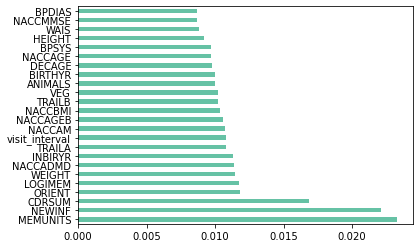

In [31]:
#Features sorted by their score
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')
cols=X_train.columns
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), cols), 
             reverse=True))

In [32]:
restrict=feat_importances.nlargest(56).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

In [33]:
model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7503480278422274
0.7375


0.6034090909090909

In [34]:
restrict=feat_importances.nlargest(24).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

In [35]:
model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7225058004640371
0.6942148760330579


0.5727272727272728

In [36]:
restrict=feat_importances.nlargest(100).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7559164733178654
0.743801652892562


0.6136363636363636

### Exploring top 100 features

In [37]:
#normalized count function because libraries suck
def norm_count_single(df, column, target):
    c=column
    df1 = df.groupby(target)[c].value_counts(normalize=True)
    df1 = df1.rename('norm').reset_index()
    sns.barplot(x=c,y='norm',hue=target,data=df1)
    
def norm_count_group(df, target):    
    ix = 1
    fig = plt.figure(figsize = (15,10))
    for c in list(df.columns):
        if ix <= 3:
            if c != target:
                ax1 = fig.add_subplot(1,3,ix)
                df1 = df.groupby(target)[c].value_counts(normalize=True)
                df1 = df1.rename('norm').reset_index()
                sns.barplot(x=c,y='norm',hue=target,data=df1,ax = ax1)
                plt.xticks(rotation=45)

        ix = ix +1
        if ix == 4: 
            fig = plt.figure(figsize = (15,10))
            ix =1

C:\Users\viceva\miniconda3\envs\AD\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


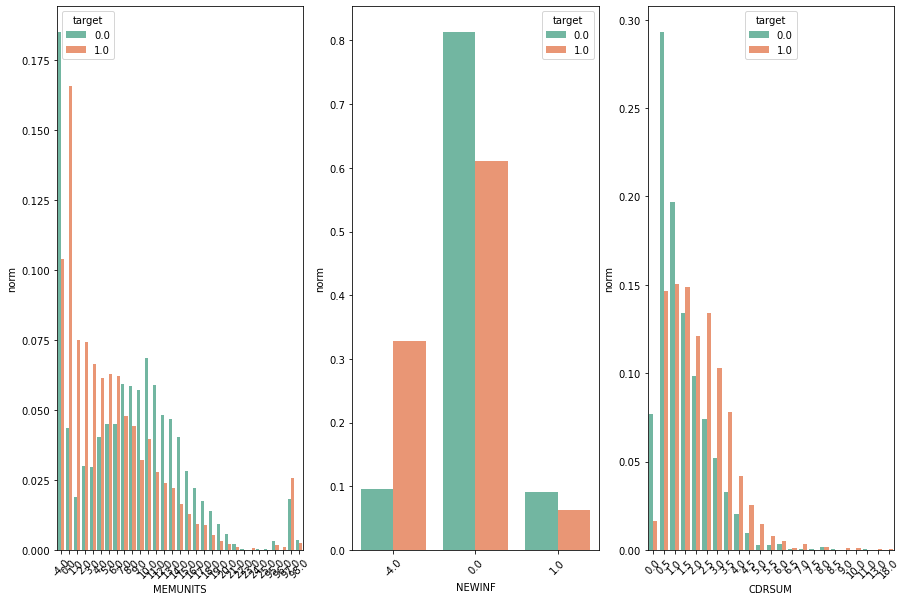

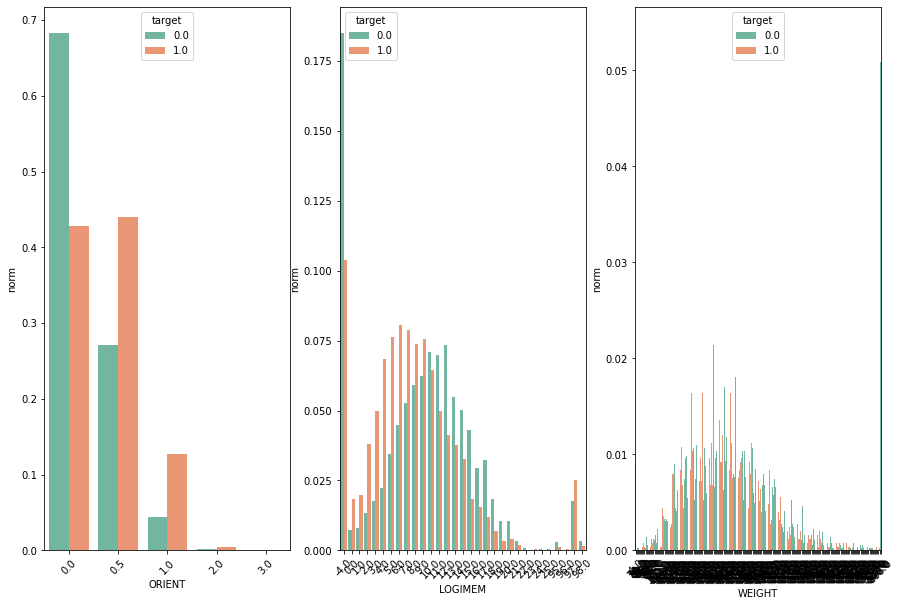

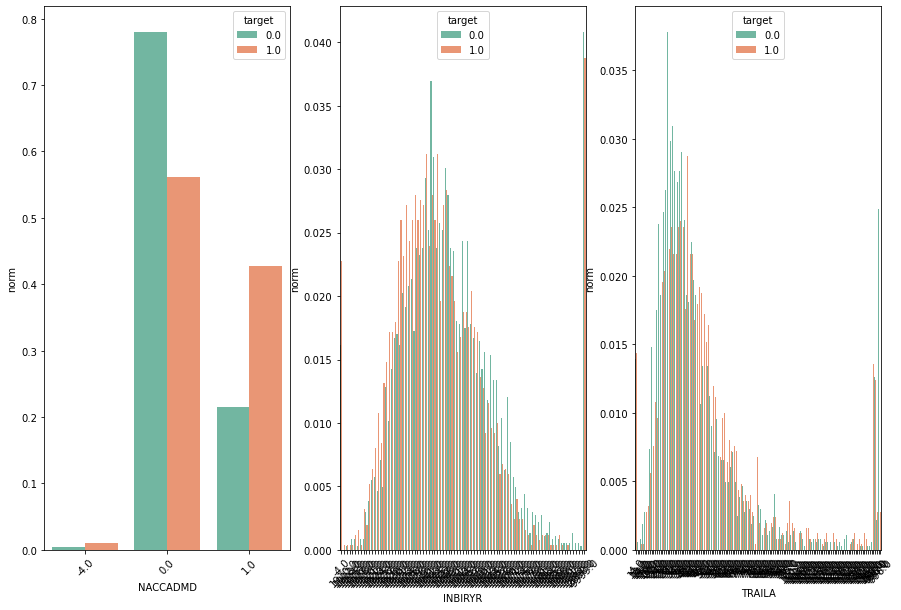

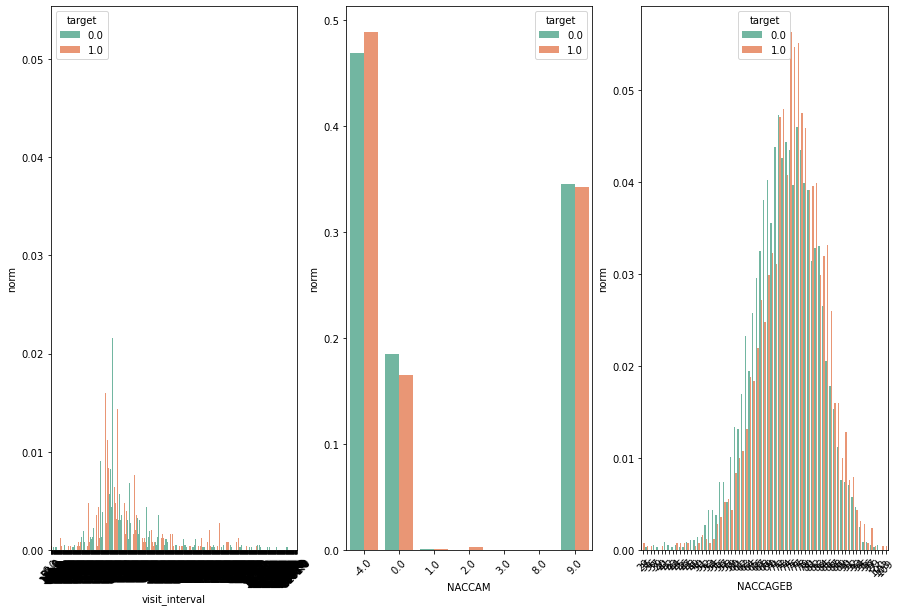

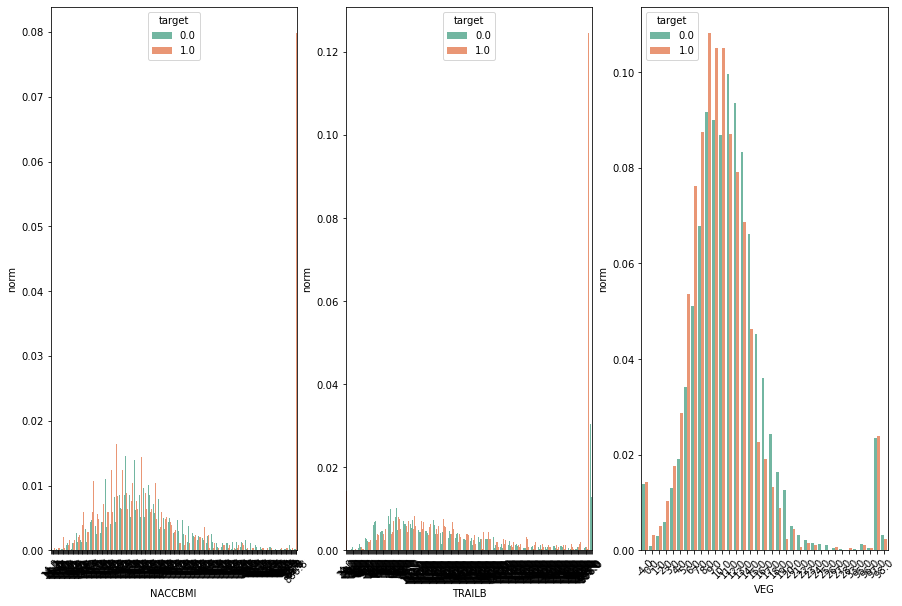

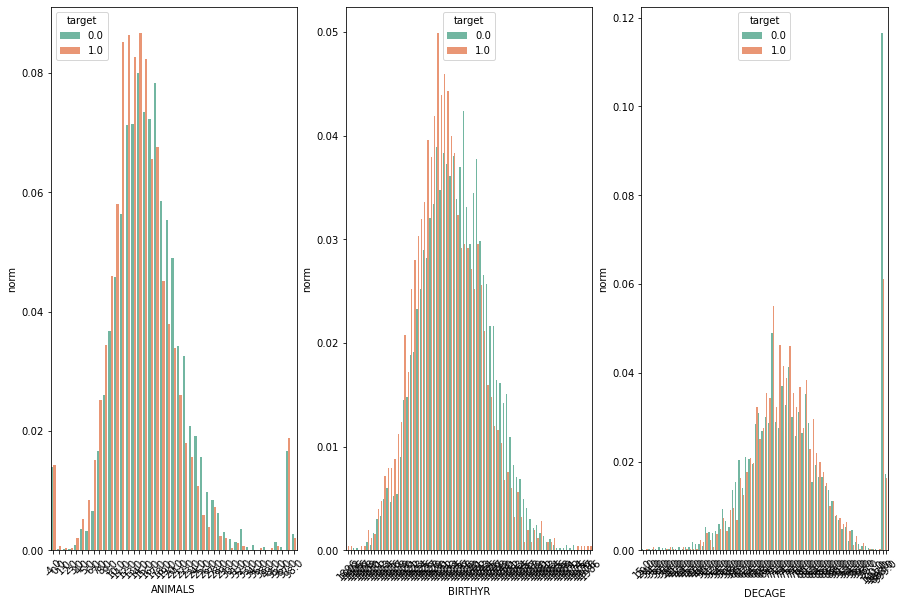

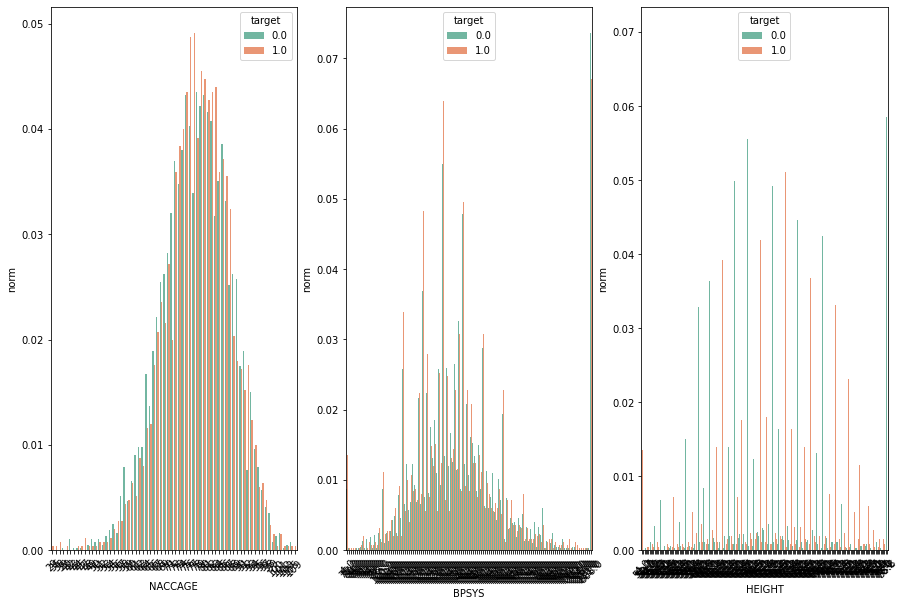

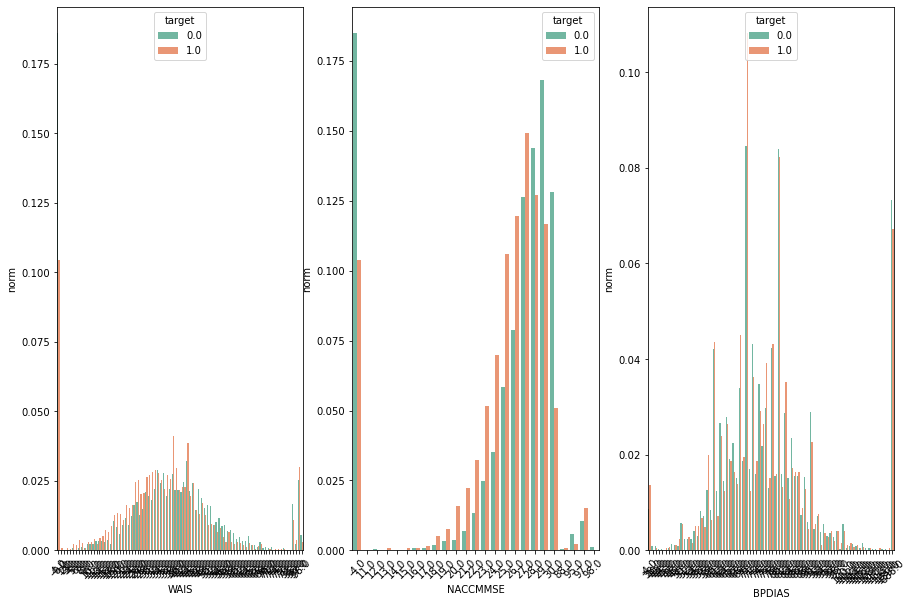

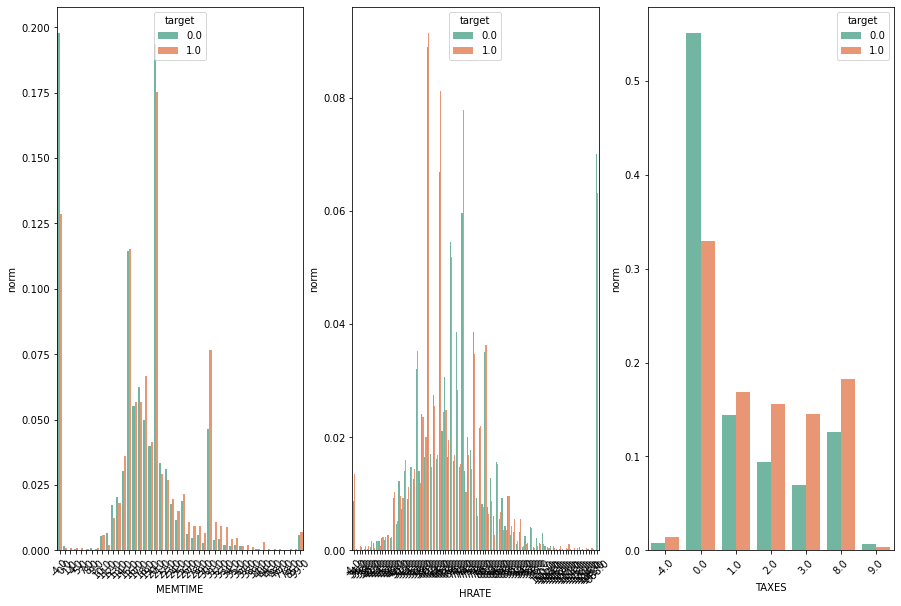

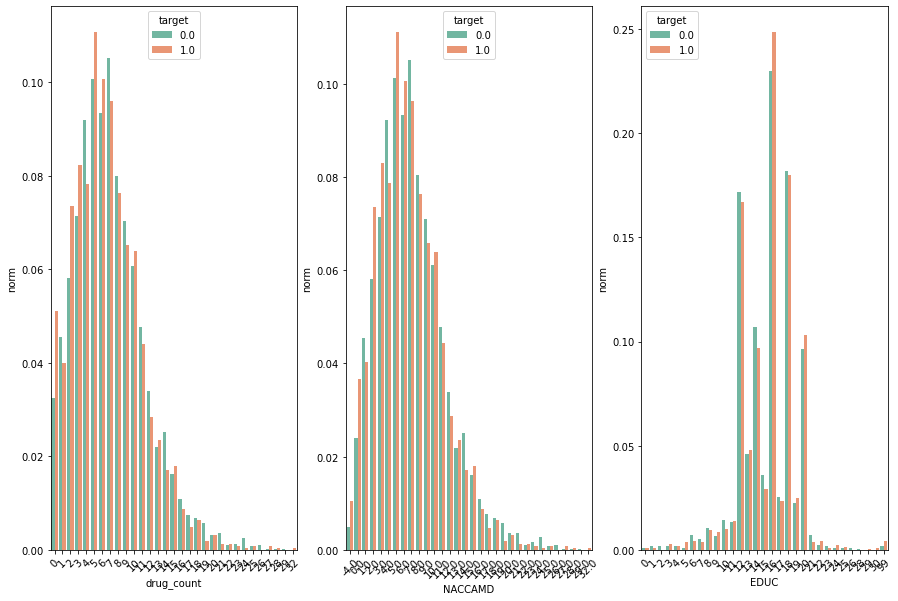

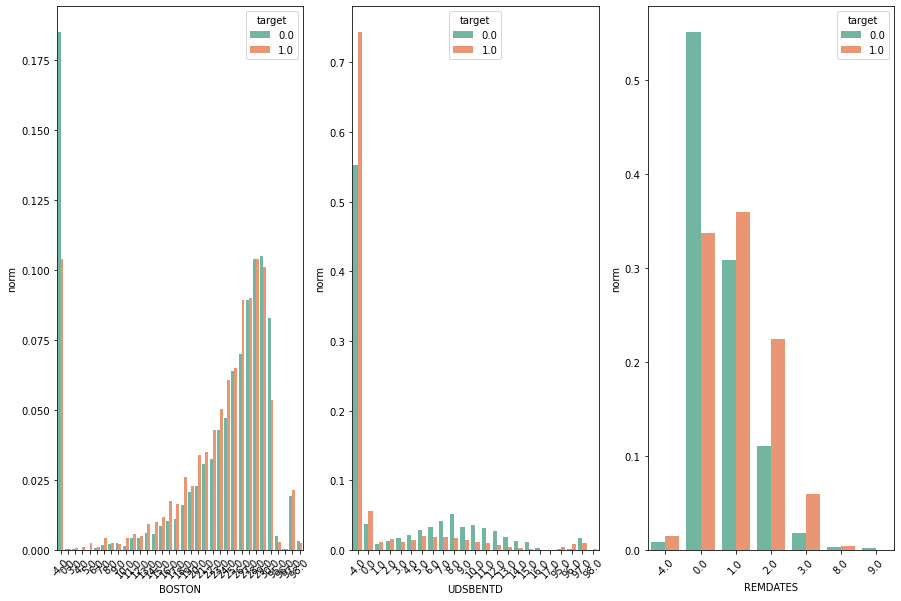

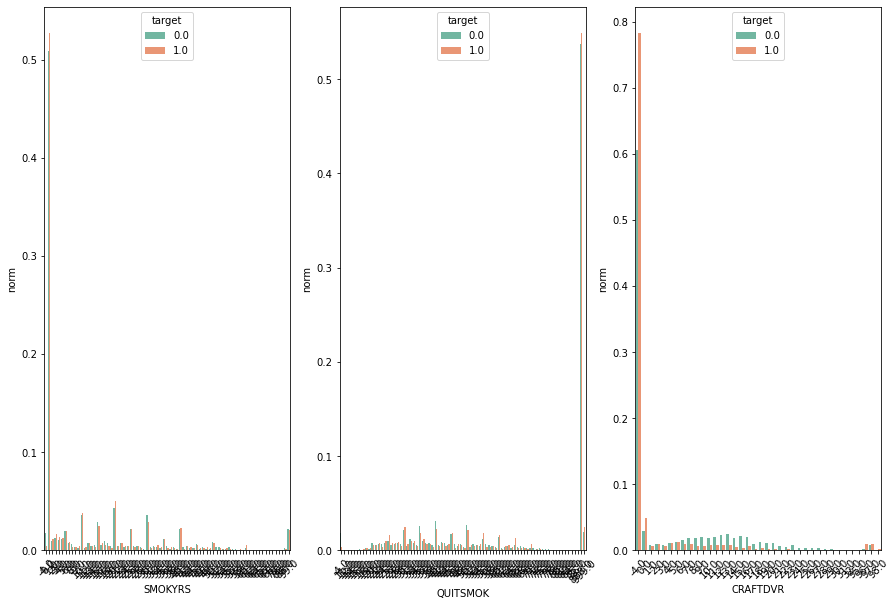

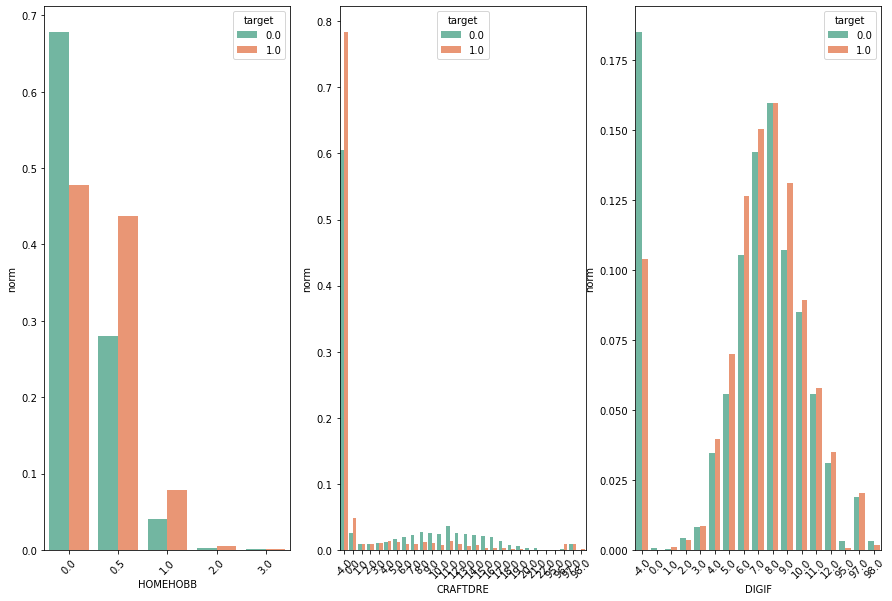

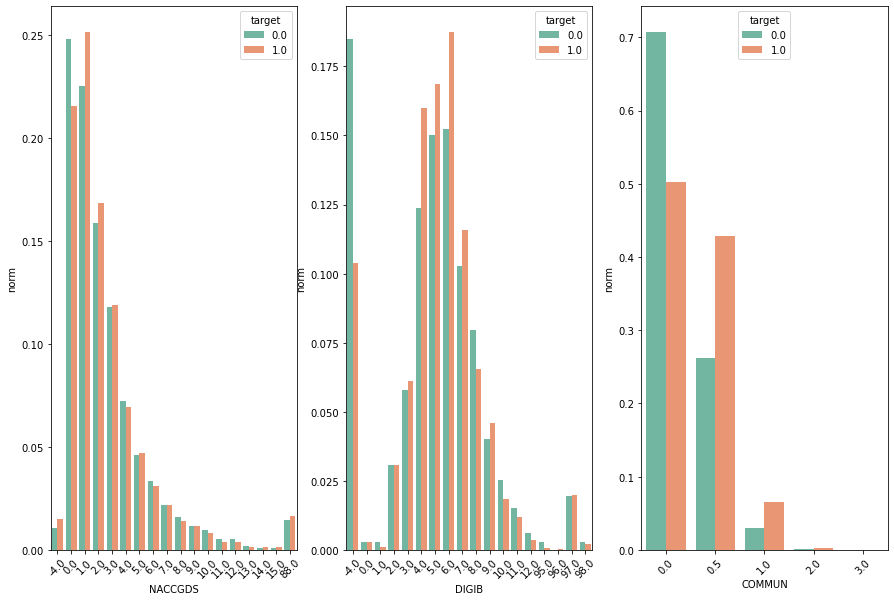

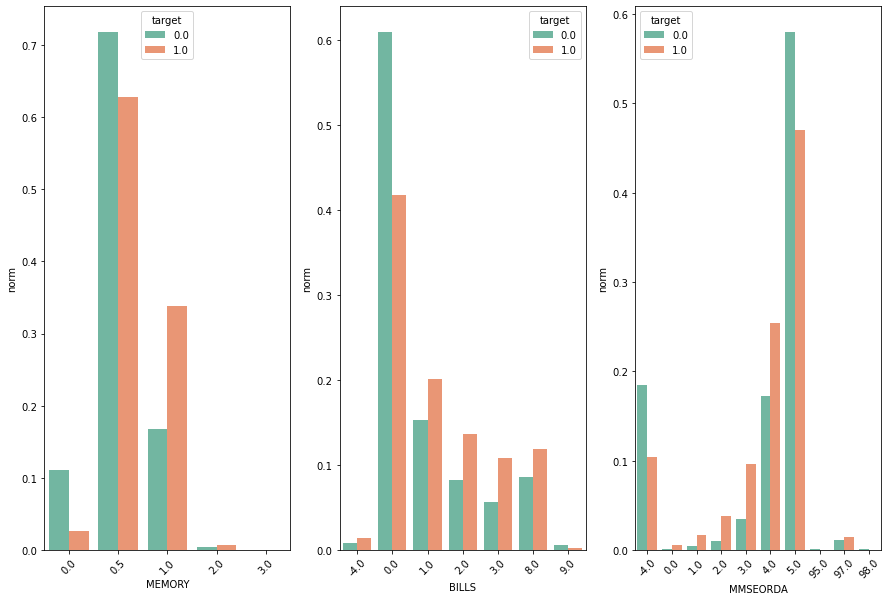

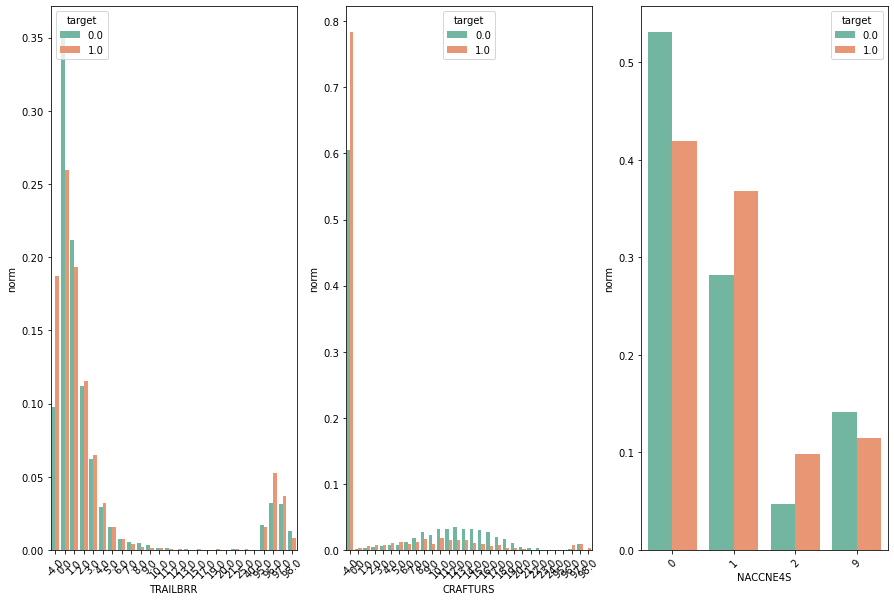

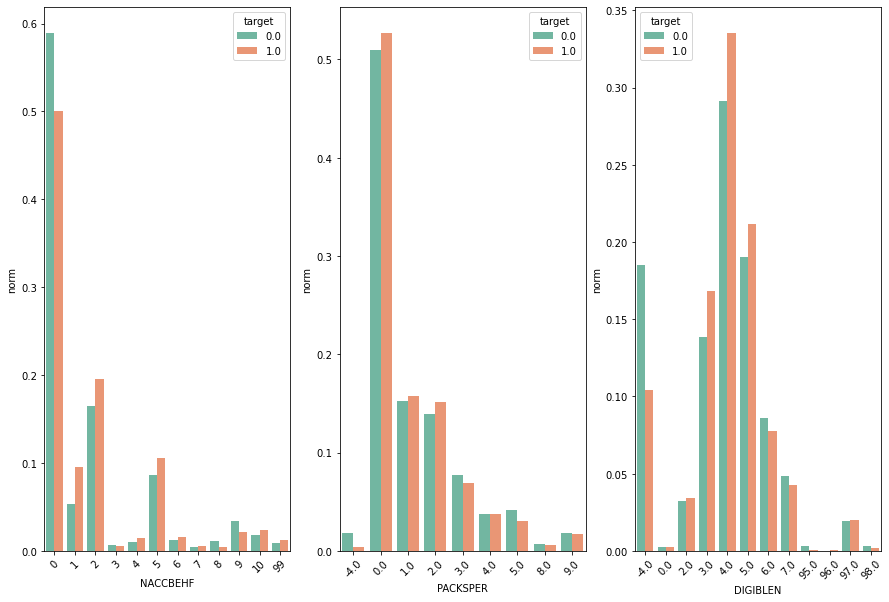

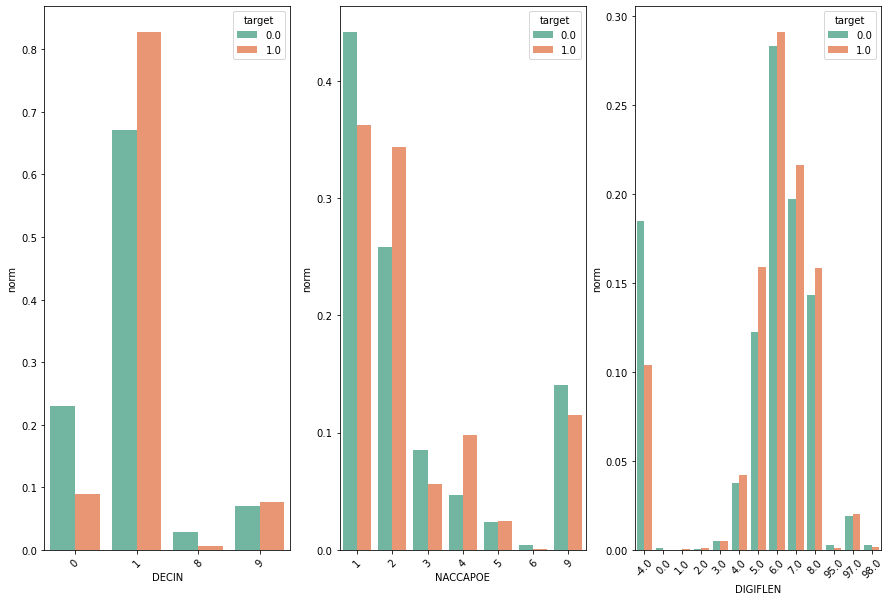

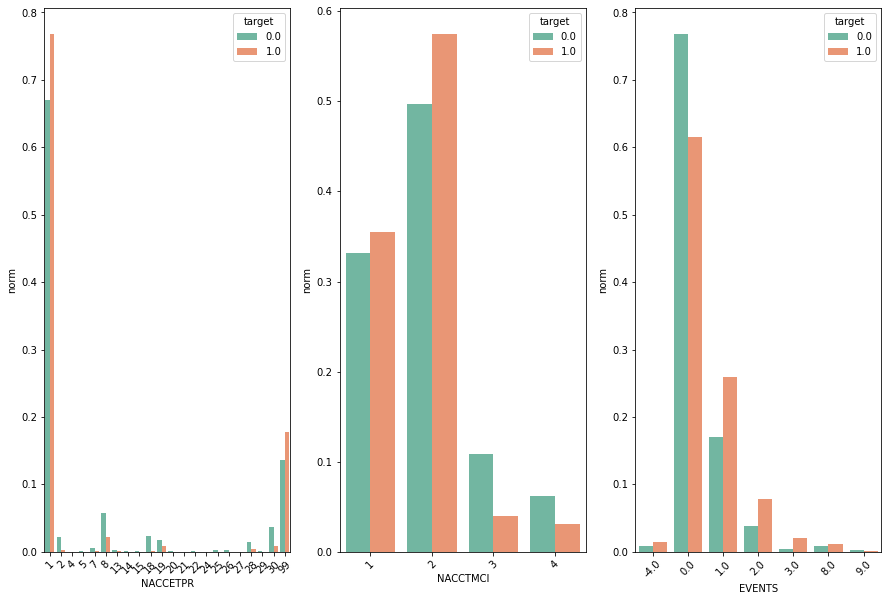

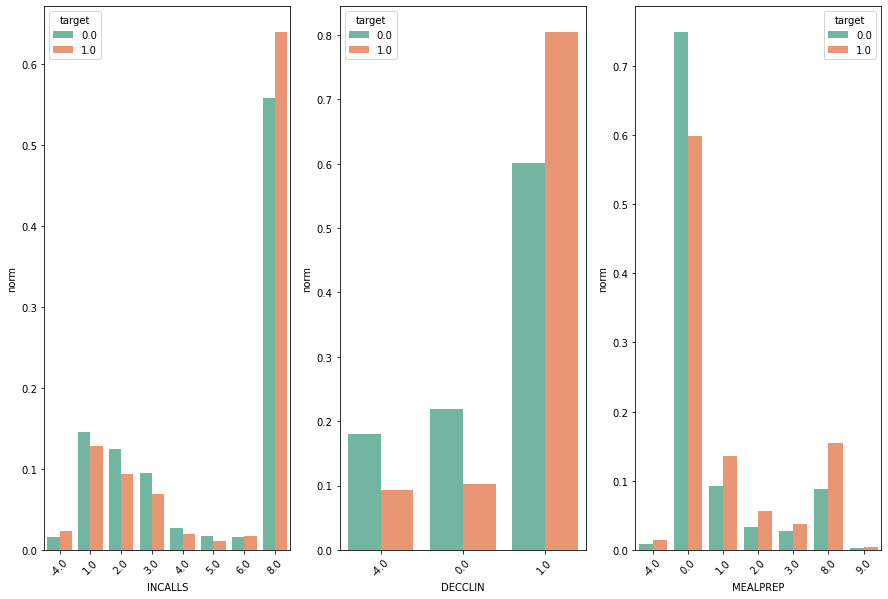

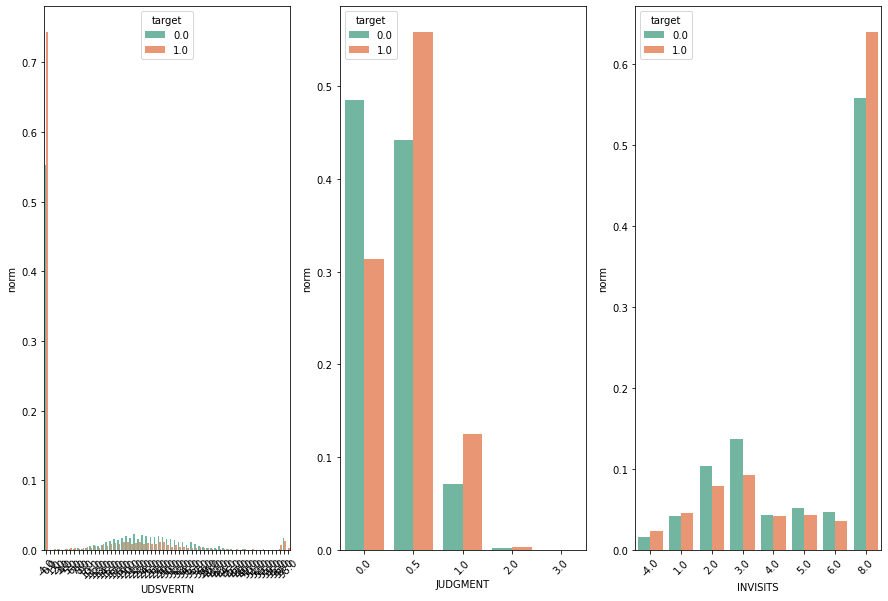

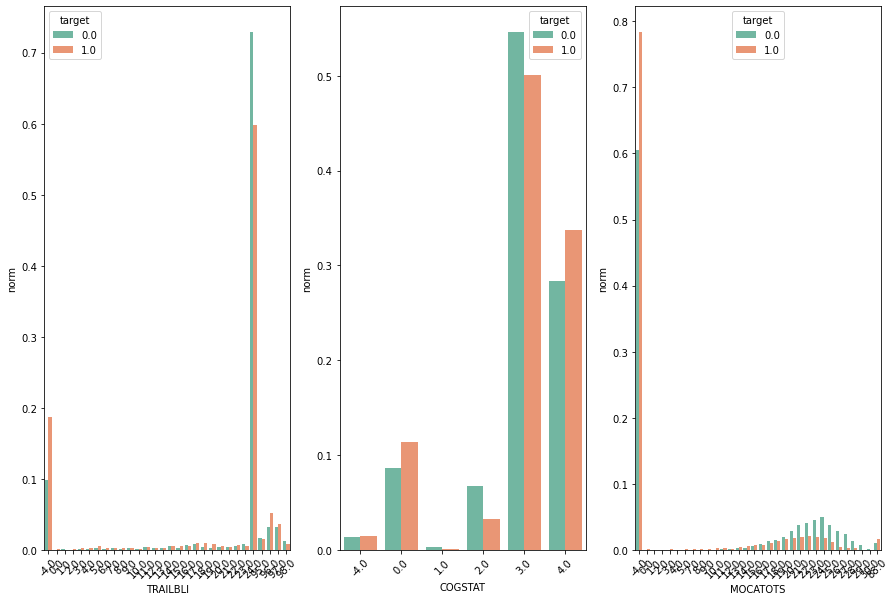

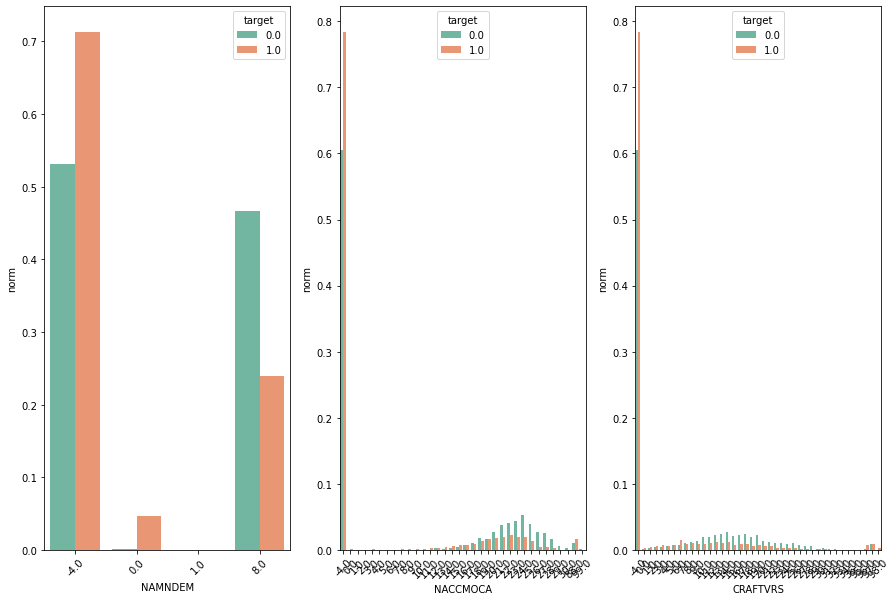

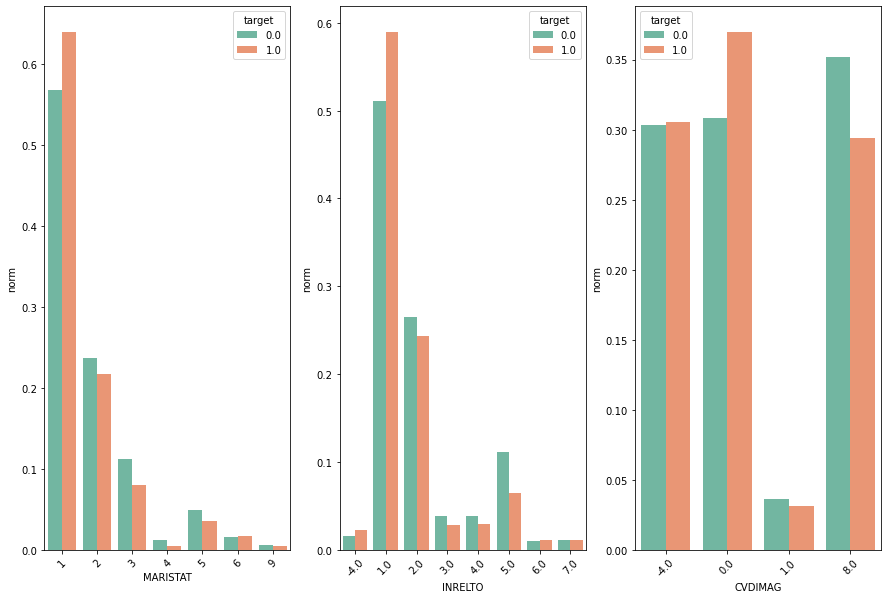

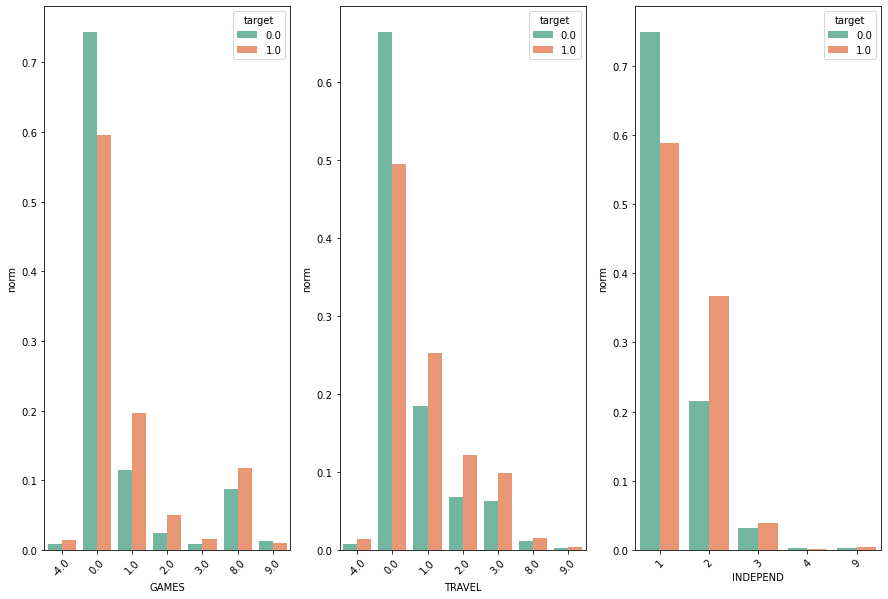

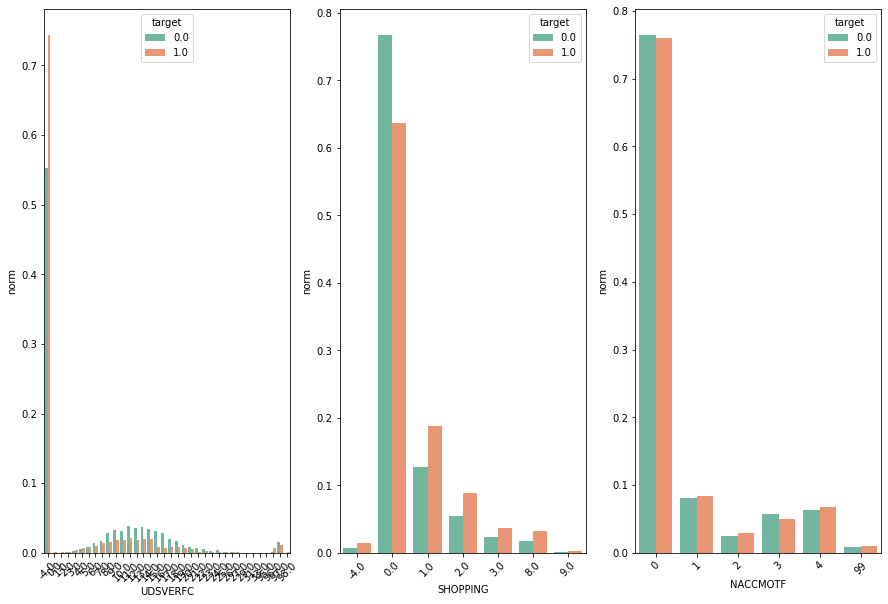

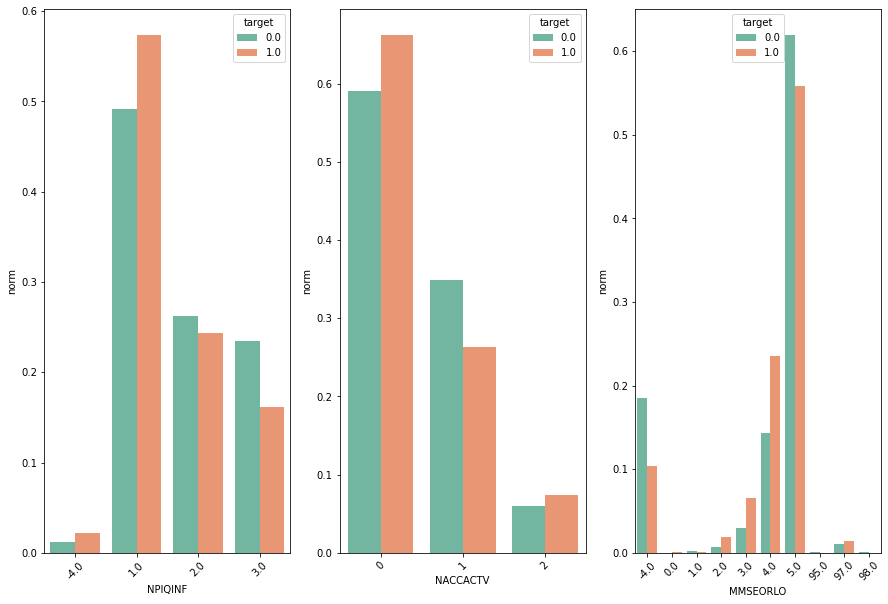

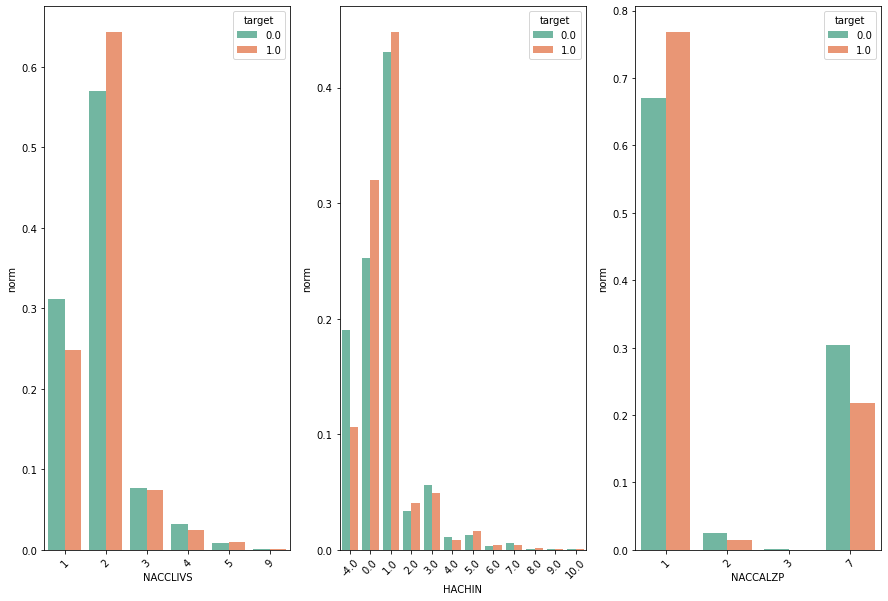

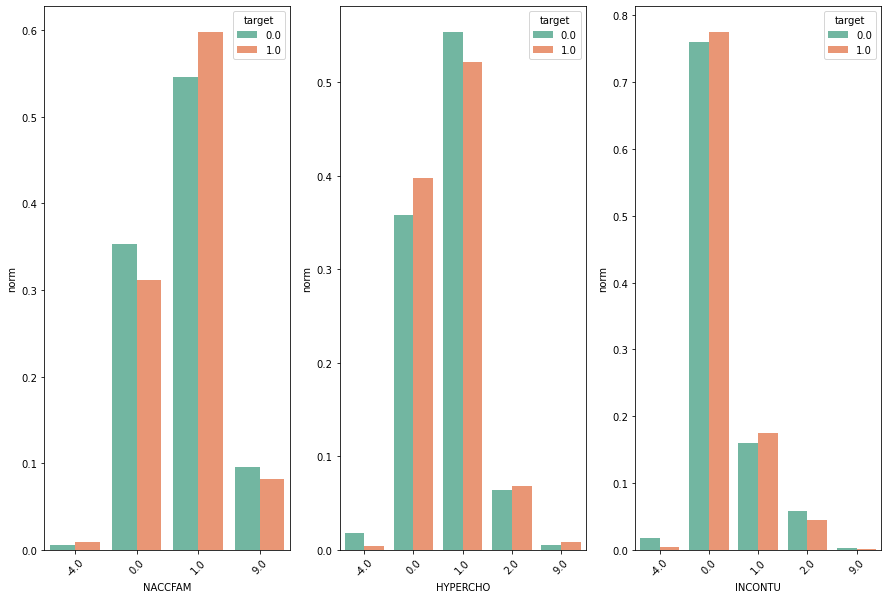

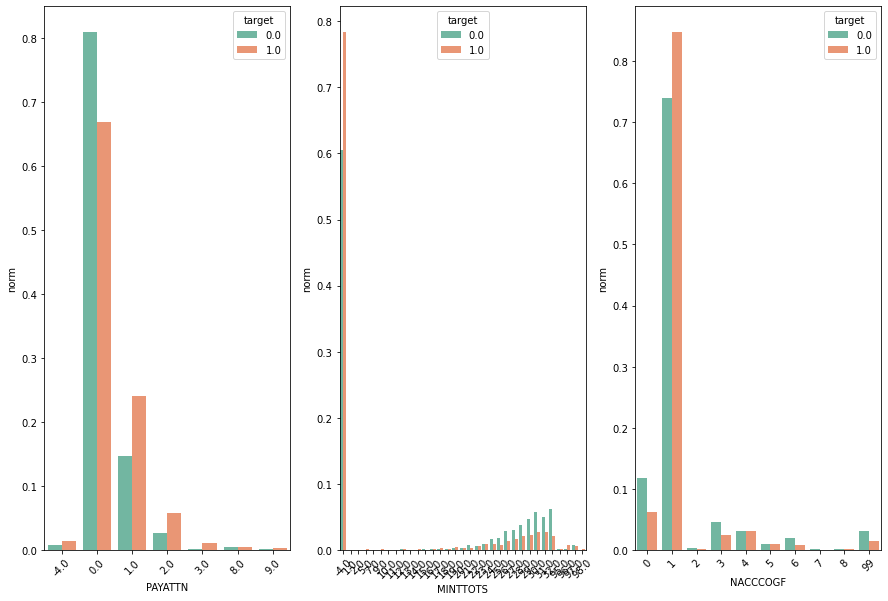

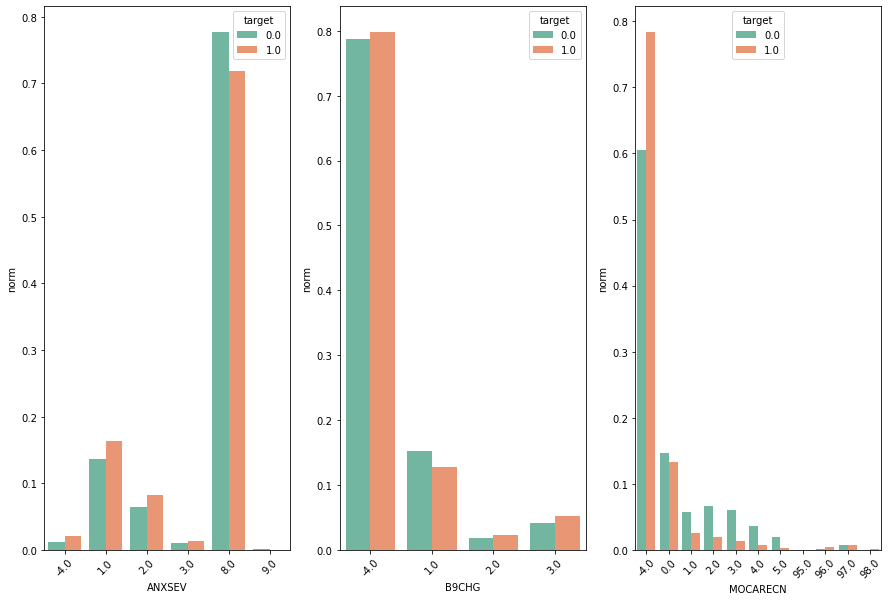

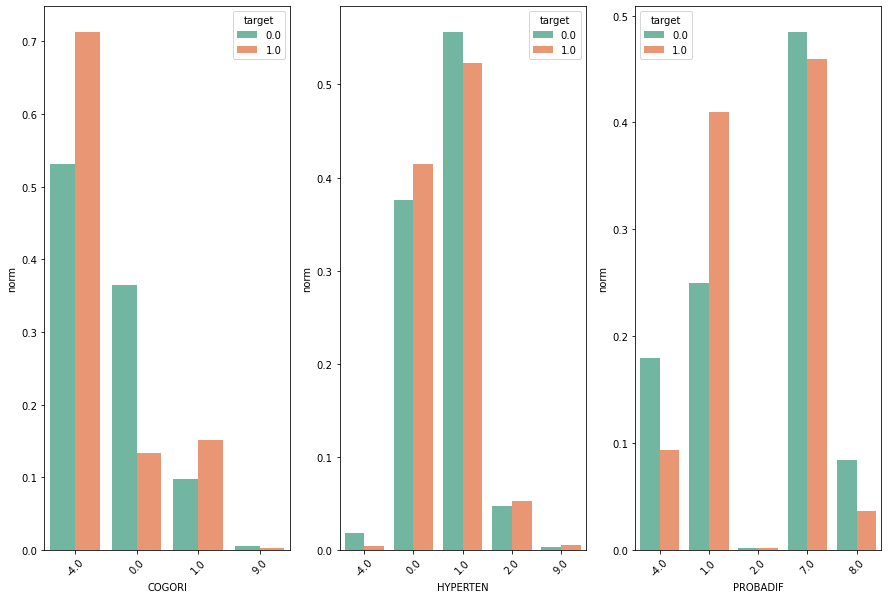

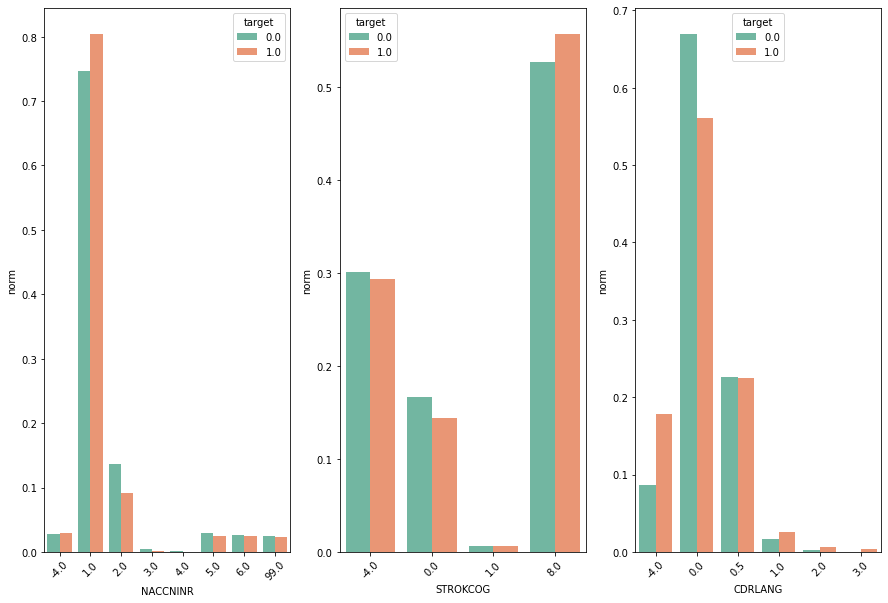

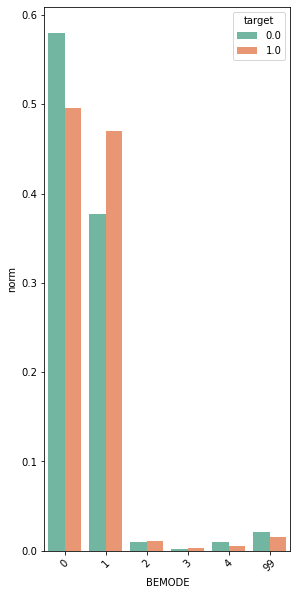

In [38]:
temp=res.copy()
temp['target']=df['target']
norm_count_group(temp,'target')

Let's do some tests without coparticipant

0.7489559164733178
0.7452966714905933
0.5852272727272727


<AxesSubplot:>

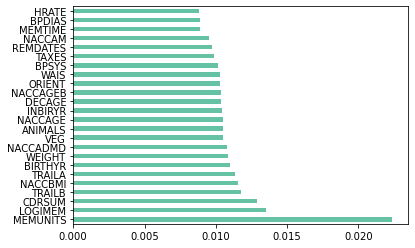

In [39]:
res=df.drop(['NEWINF','target','visit_interval'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')

Precision is lower but overall works fine

What's the performance if we drop tests that have >50% null

In [40]:
restricted = df.loc[:,~df.eq(-4).sum().gt(len(df)/2)]
restricted

,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,NACCTCSF,NACCMRSA,NACCNMRI,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,1920,0,88,5,88,88,1,15,1,2,...,0,0,0,0,0,1,0,427.0,1.0,5
1,1939,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,2,1,474.0,1.0,4
2,1932,0,88,5,88,88,3,20,1,2,...,0,0,0,0,0,1,0,413.0,1.0,7
4,1935,0,88,1,88,88,1,24,2,1,...,0,0,0,0,0,1,0,327.0,1.0,8
5,1935,0,88,1,88,88,1,20,2,1,...,0,0,0,0,0,2,1,264.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18759,1921,0,88,1,88,88,1,12,1,2,...,0,0,0,0,0,9,9,370.0,0.0,9
18761,1951,0,88,1,88,88,1,16,1,2,...,0,1,1,0,0,2,1,723.0,0.0,5
18764,1930,0,88,1,88,88,1,16,1,3,...,0,0,0,0,0,1,0,351.0,0.0,3
18767,1928,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,1,0,315.0,0.0,7


Initial model without coparticipants & visit interval, + dropped nan columns

0.7211136890951276
0.7042459736456809
0.5465909090909091


<AxesSubplot:>

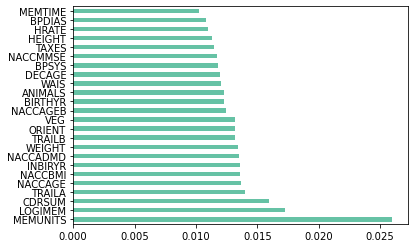

In [41]:
res=restricted.drop(['NEWINF','target','visit_interval'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')

C:\Users\viceva\miniconda3\envs\AD\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


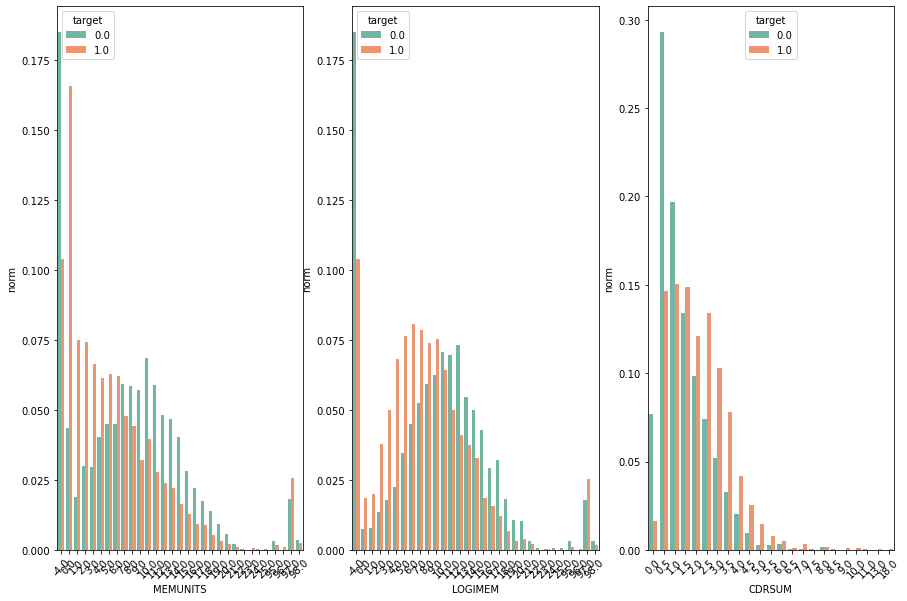

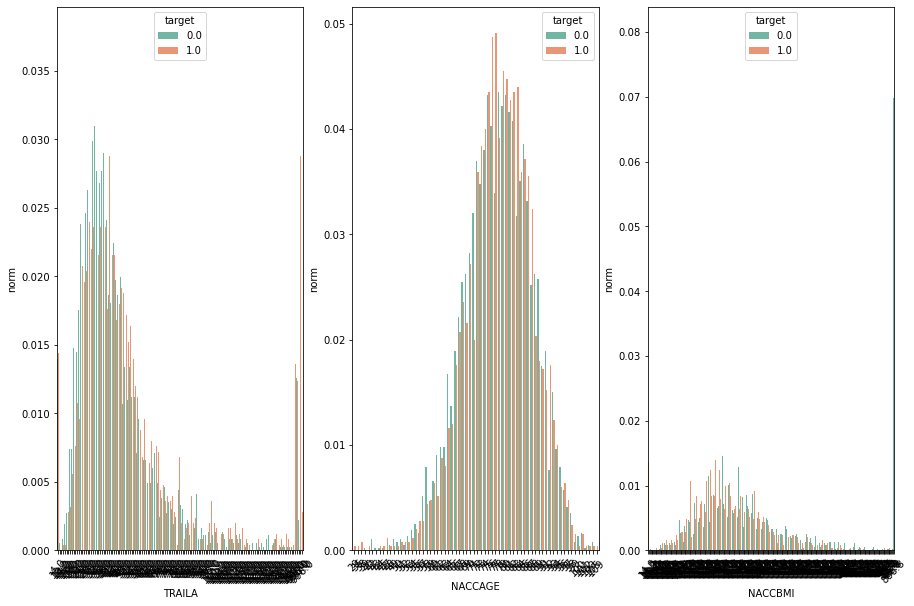

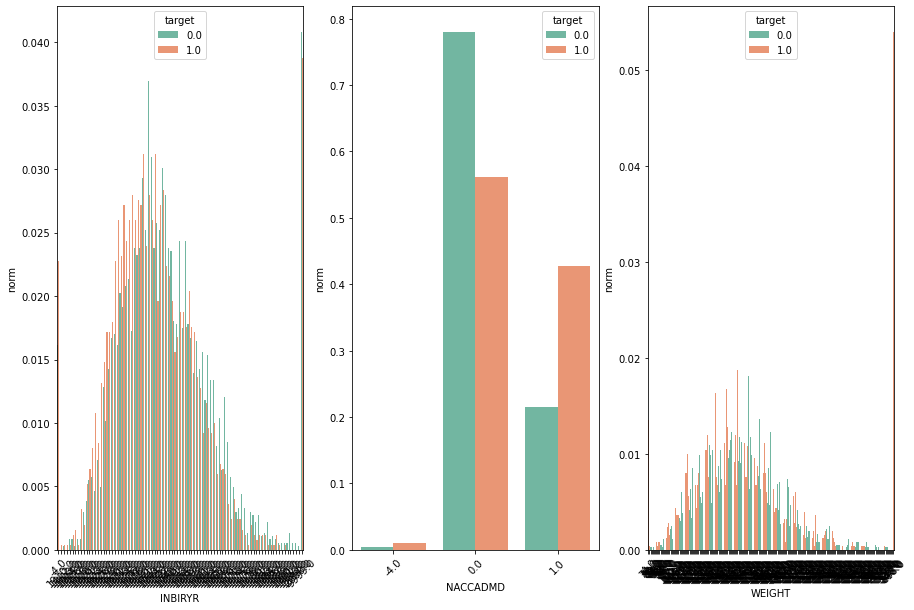

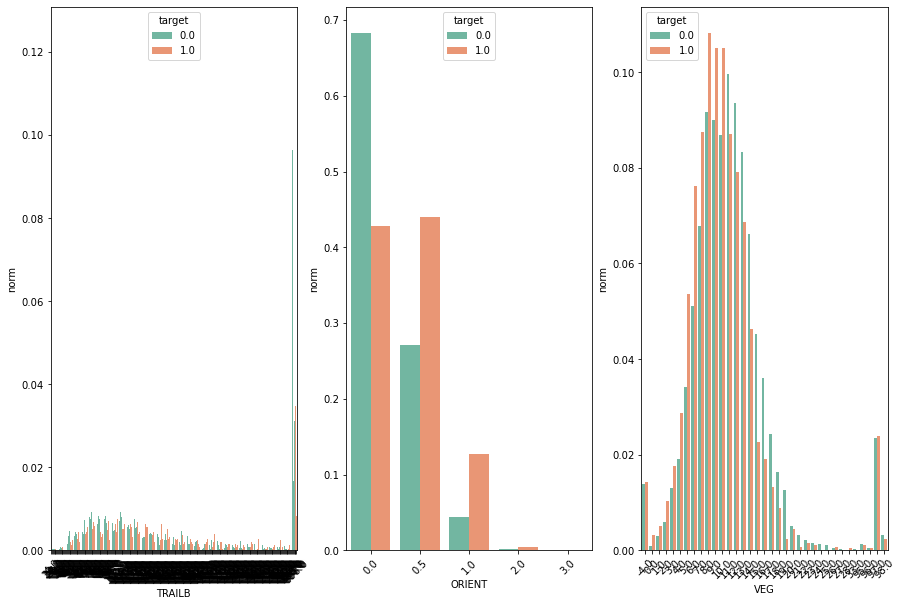

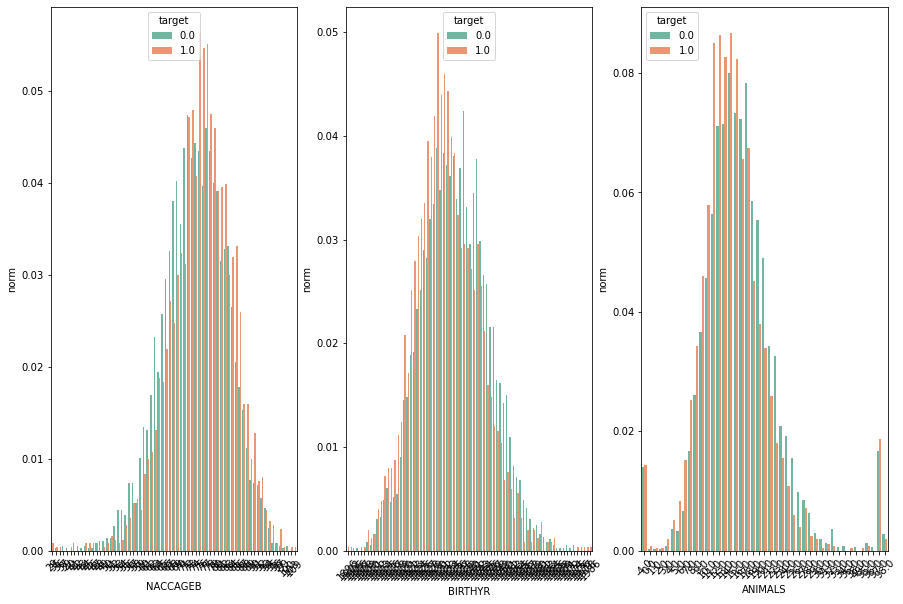

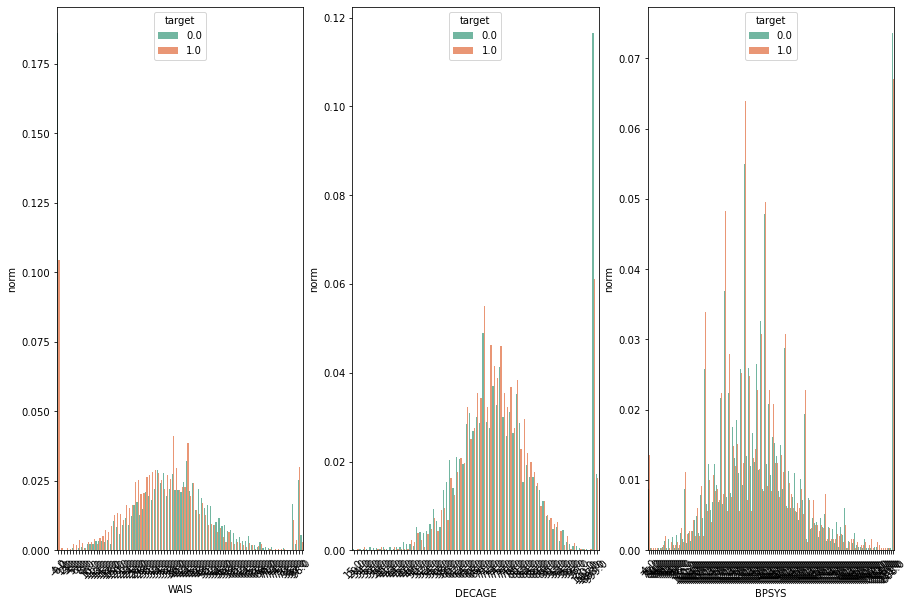

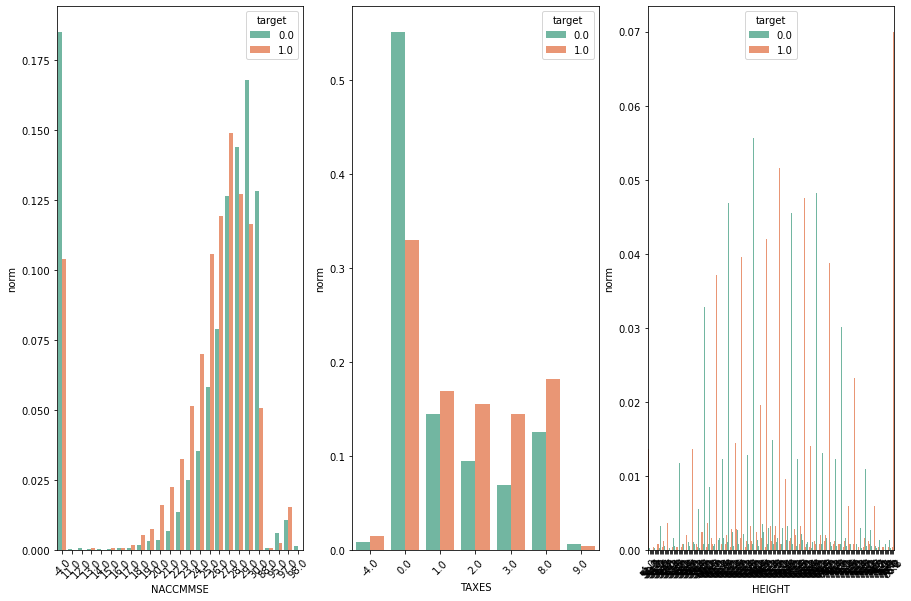

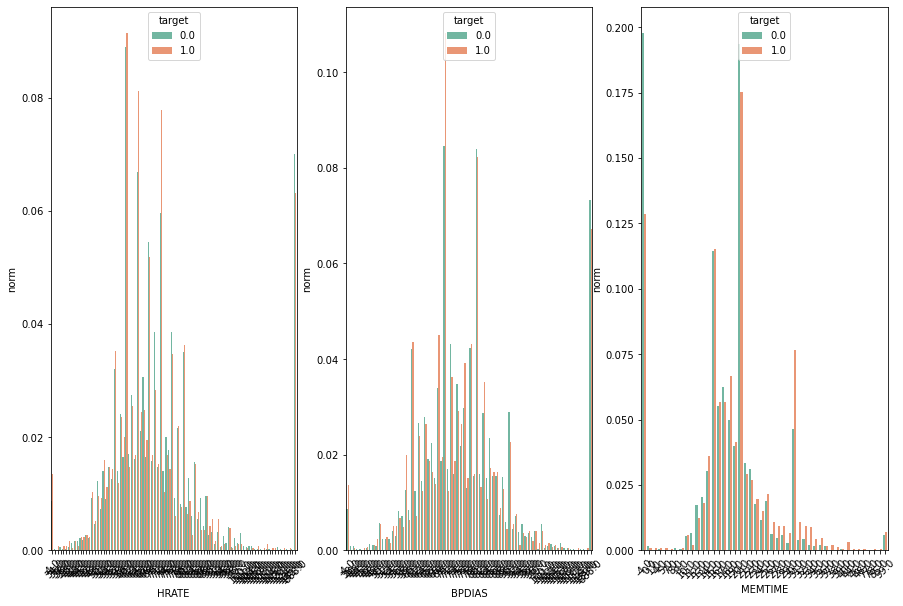

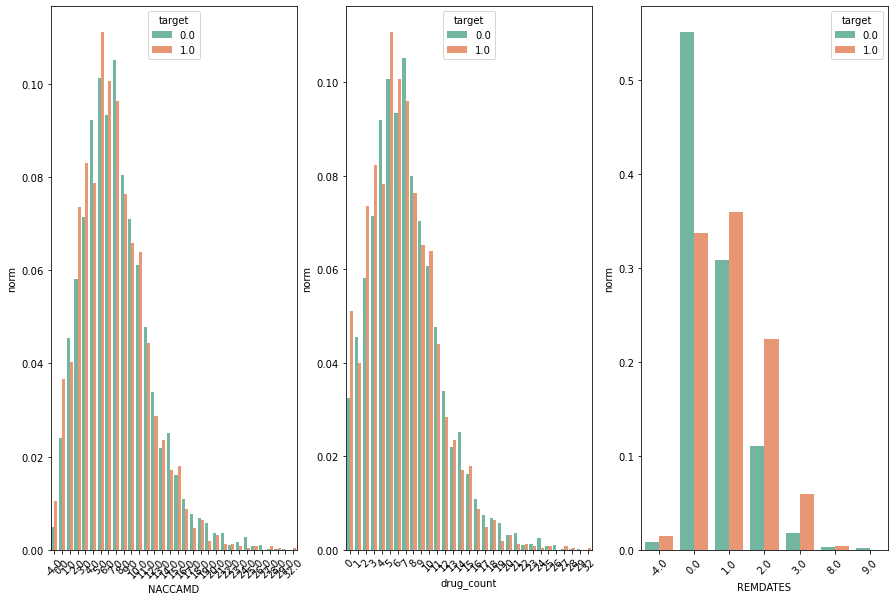

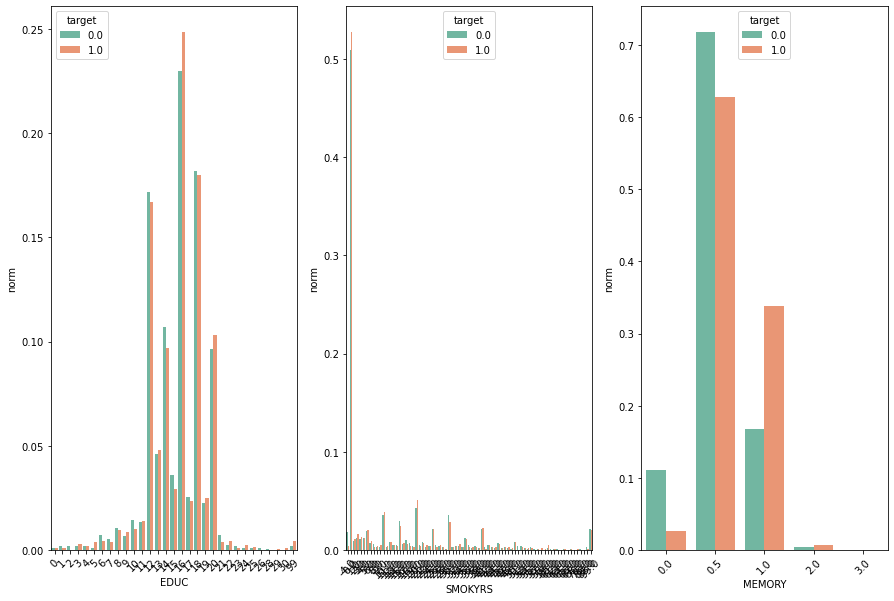

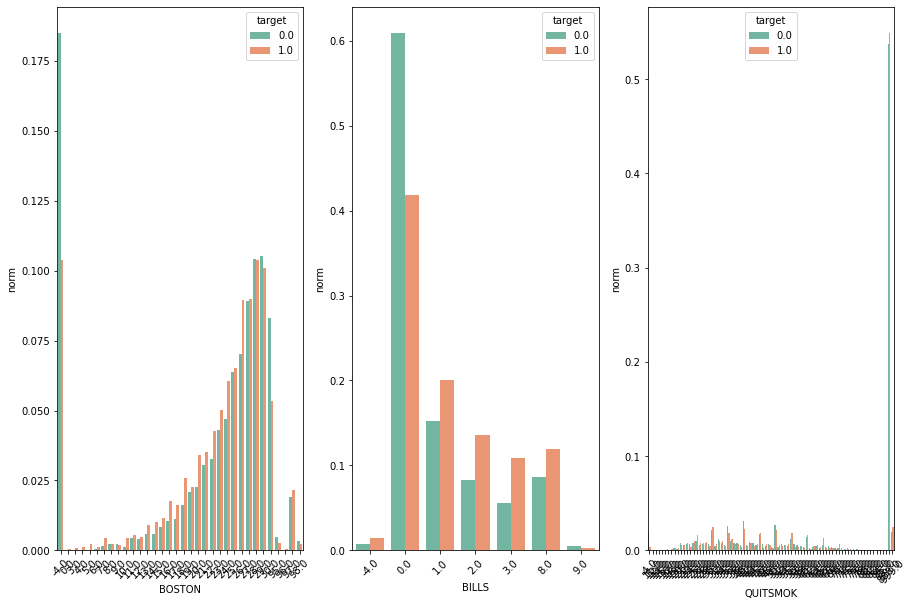

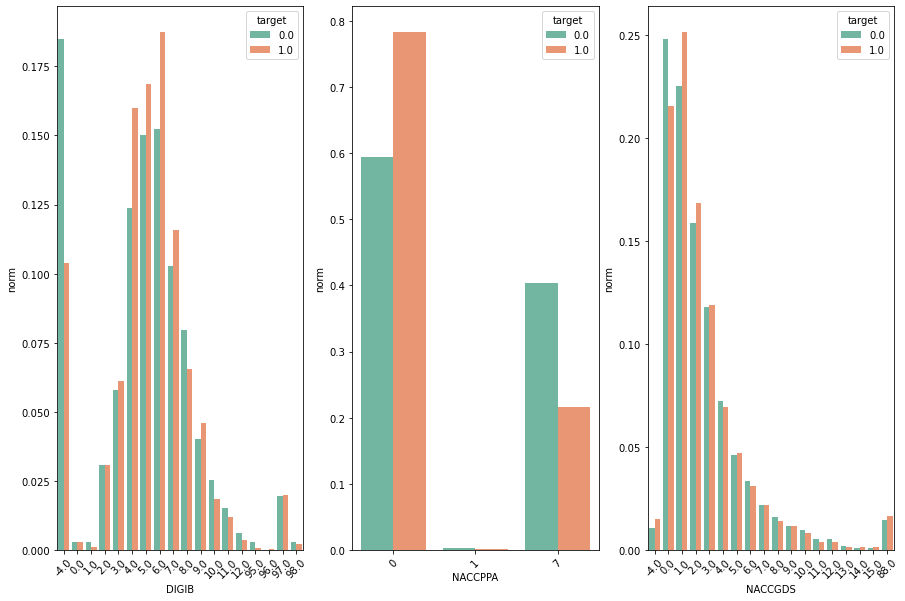

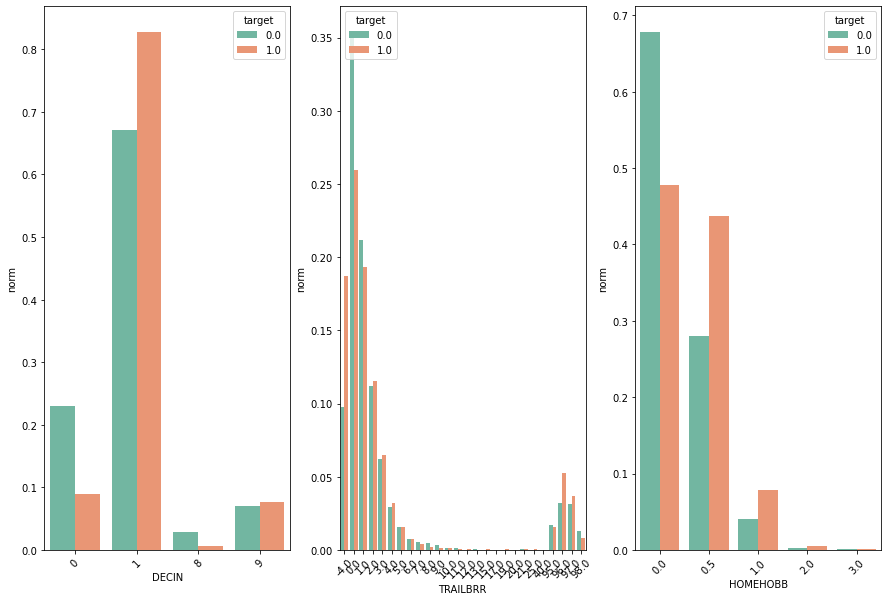

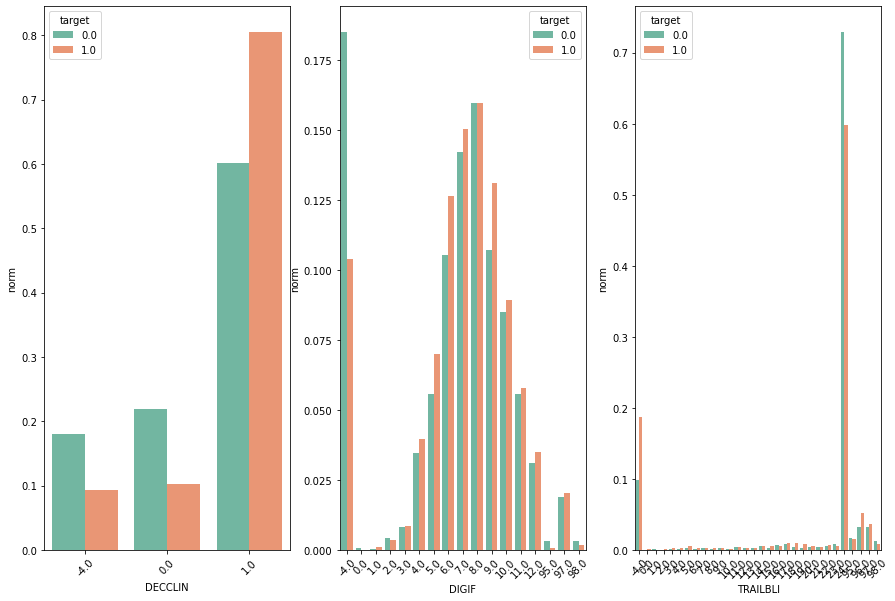

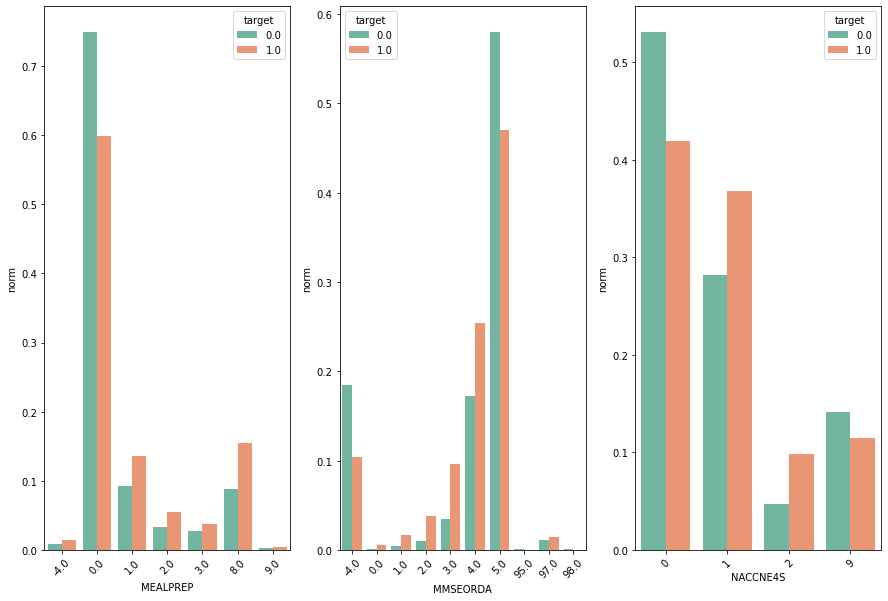

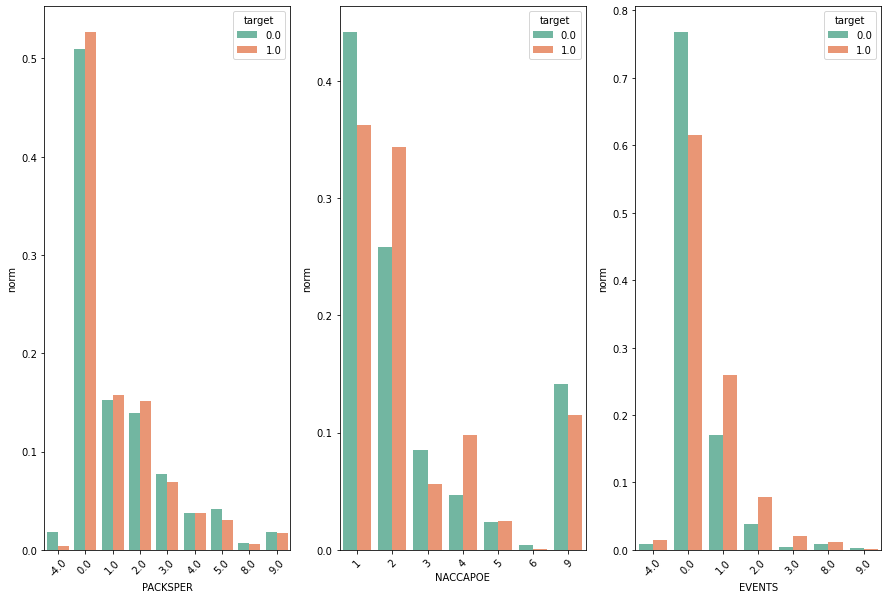

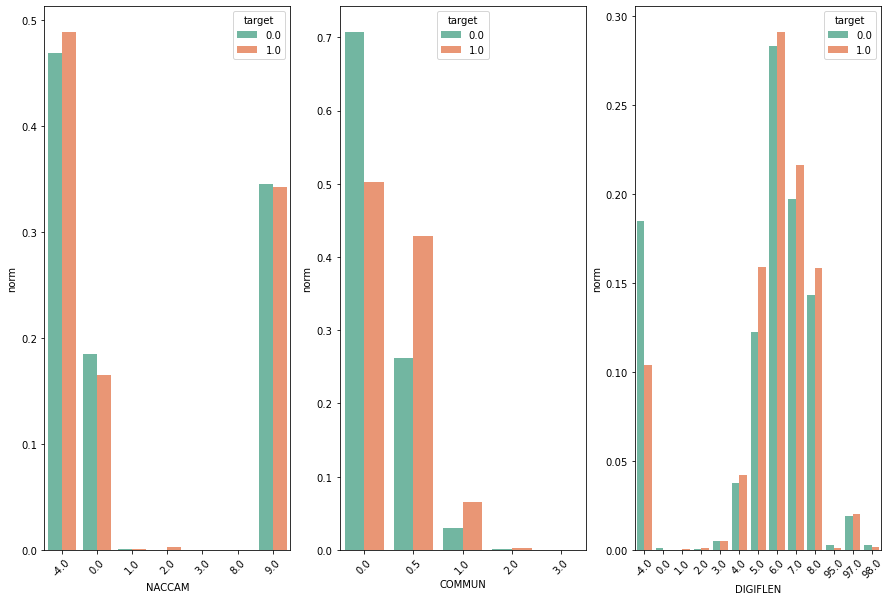

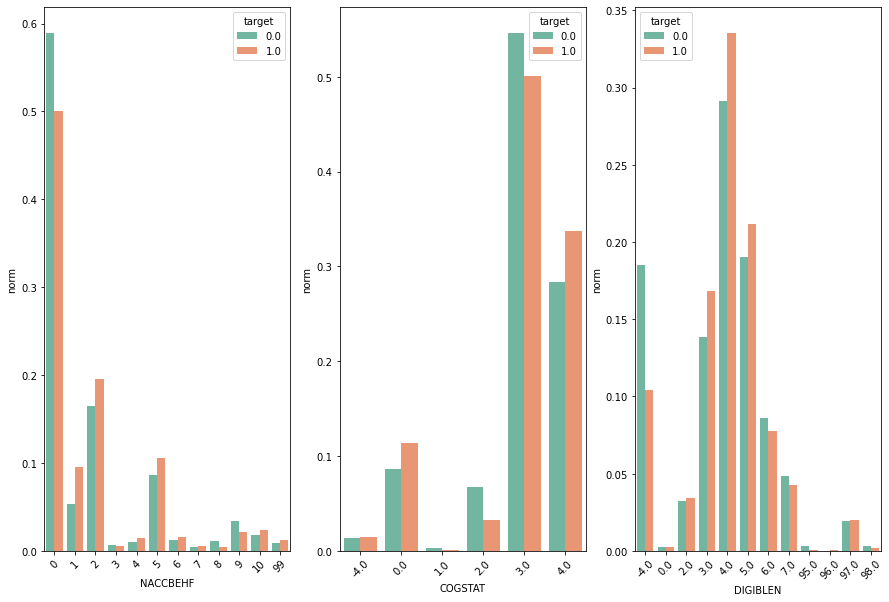

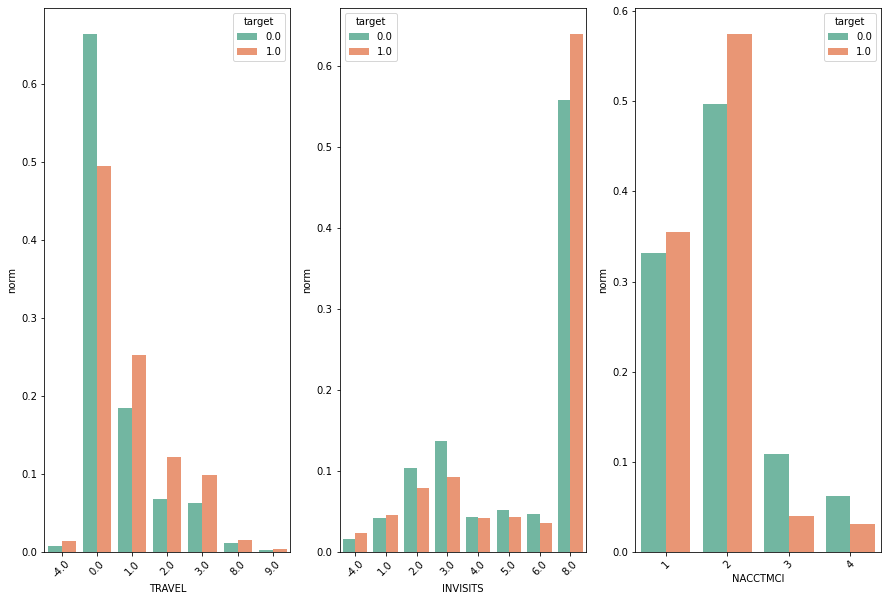

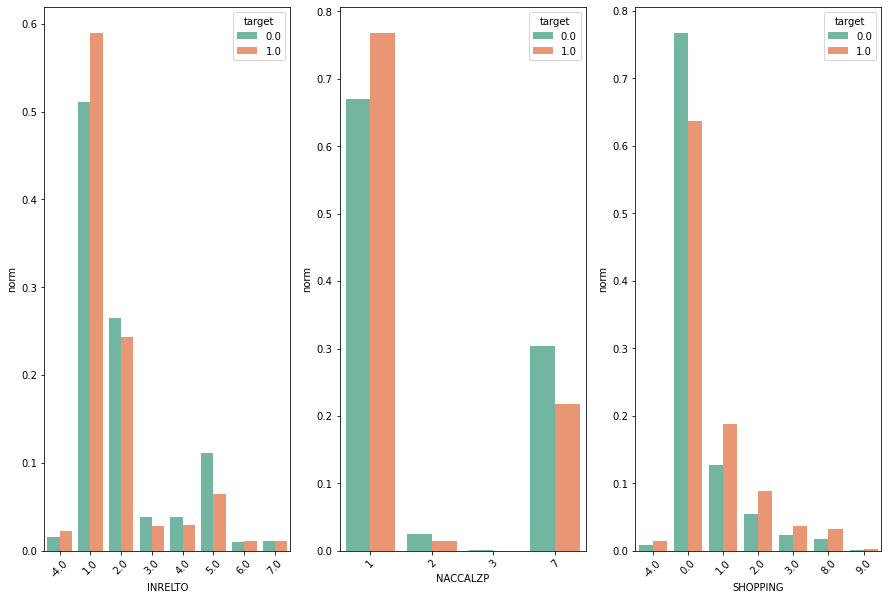

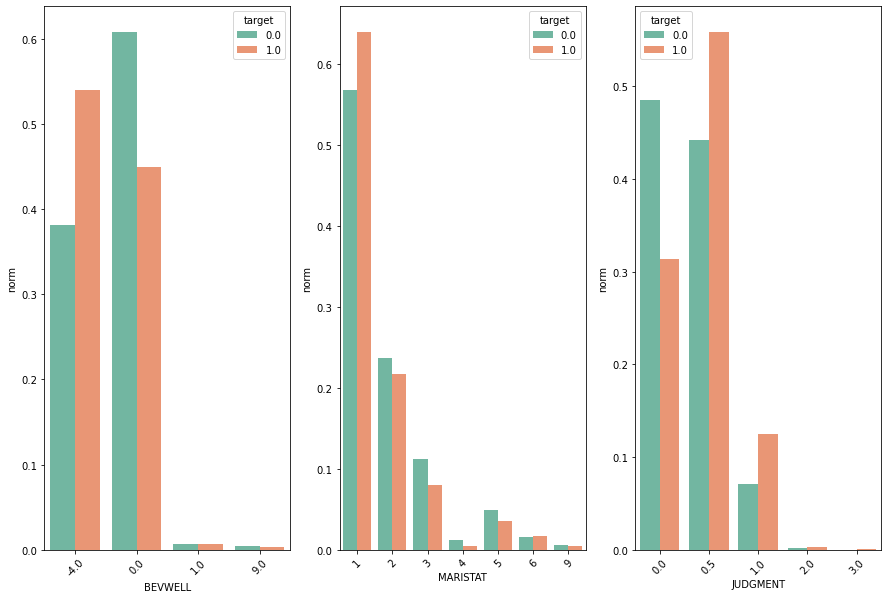

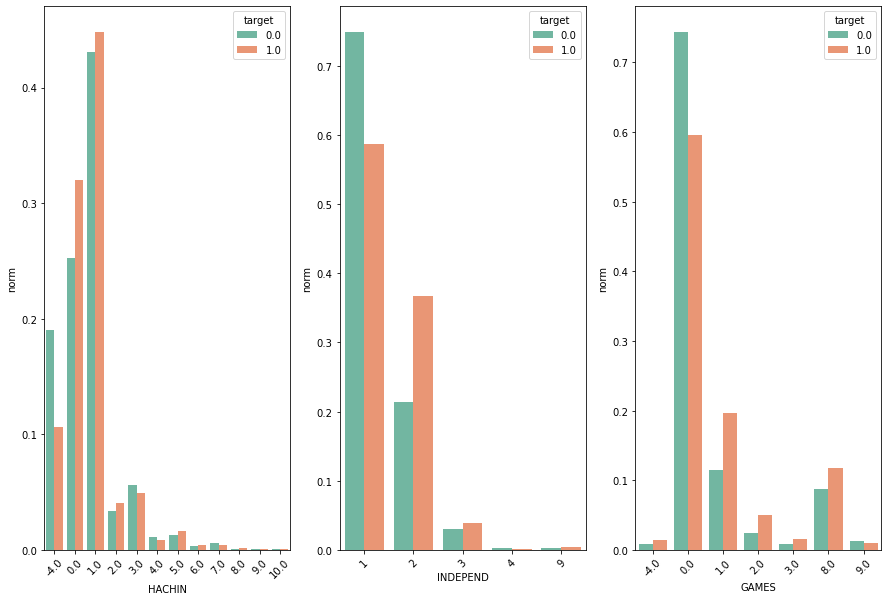

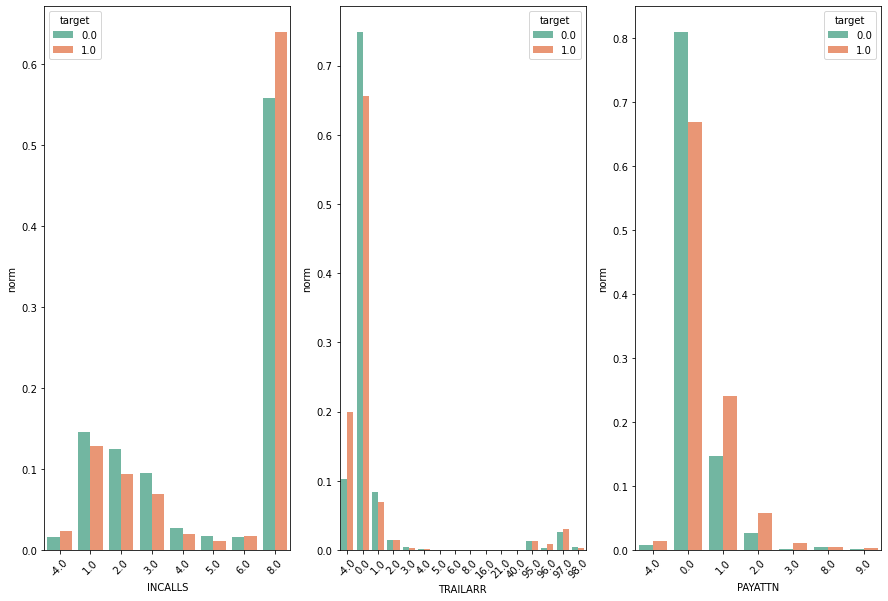

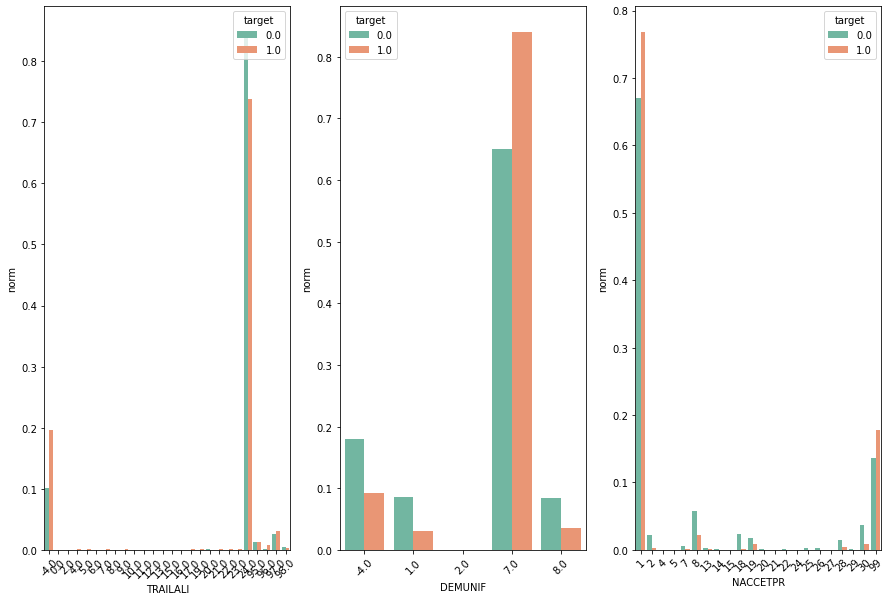

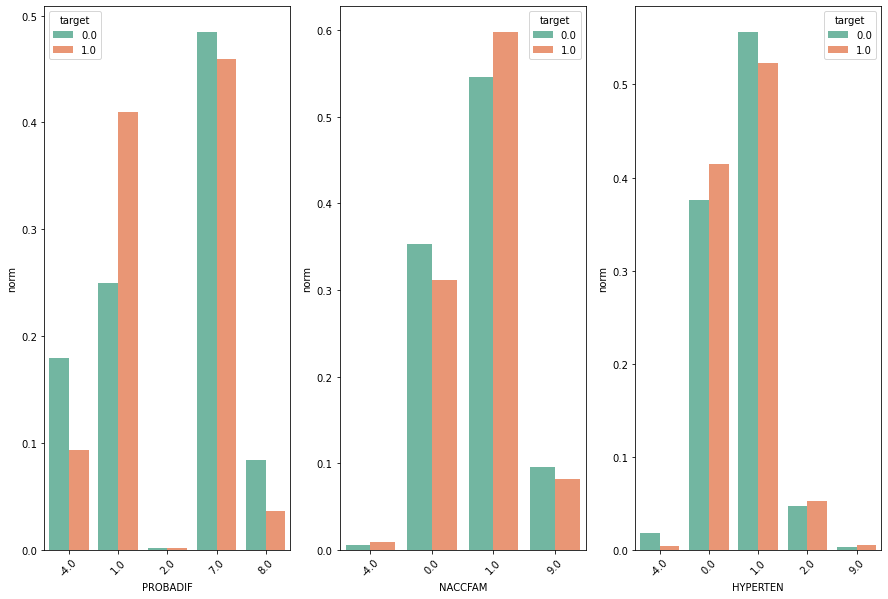

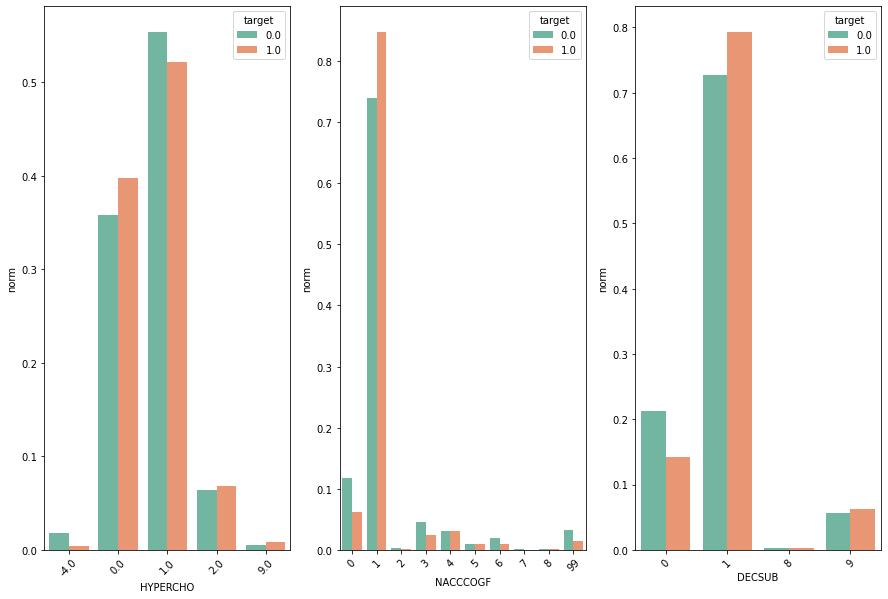

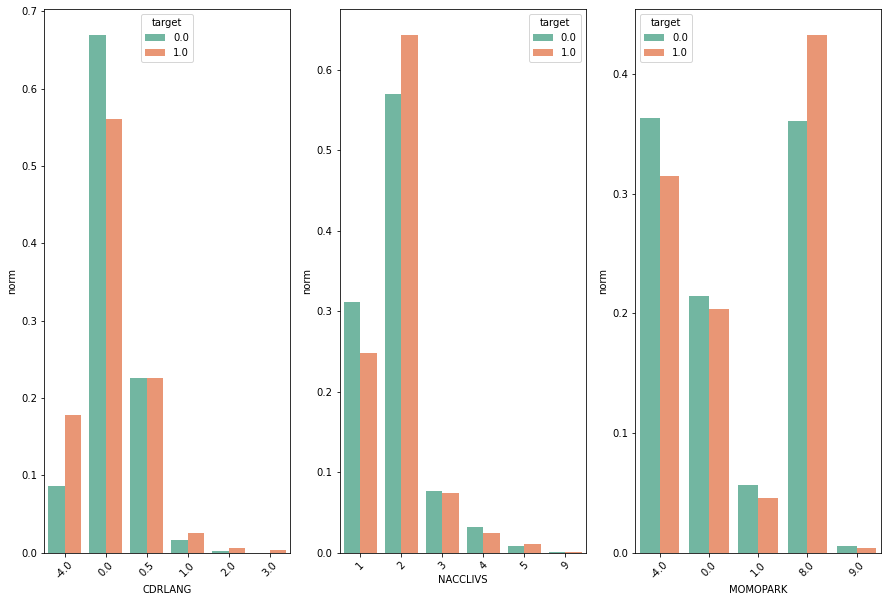

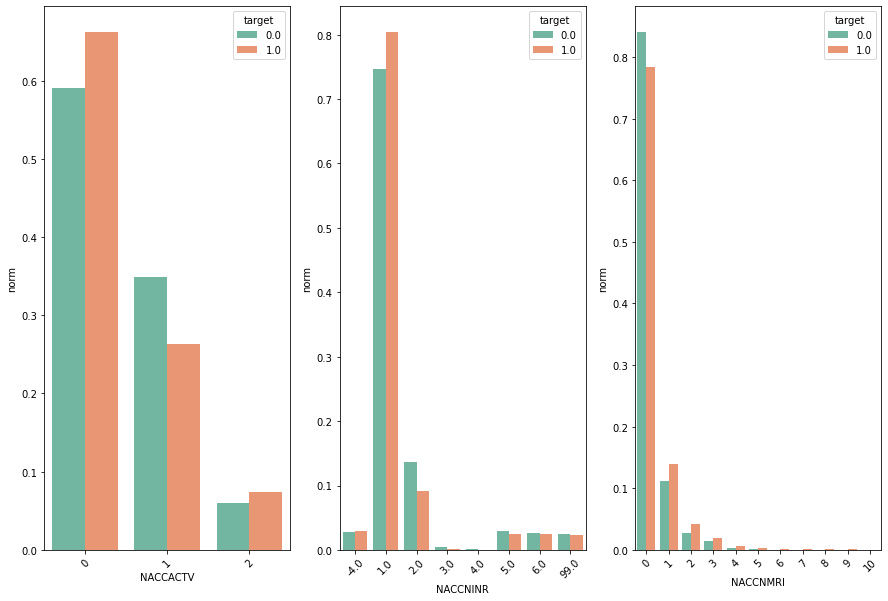

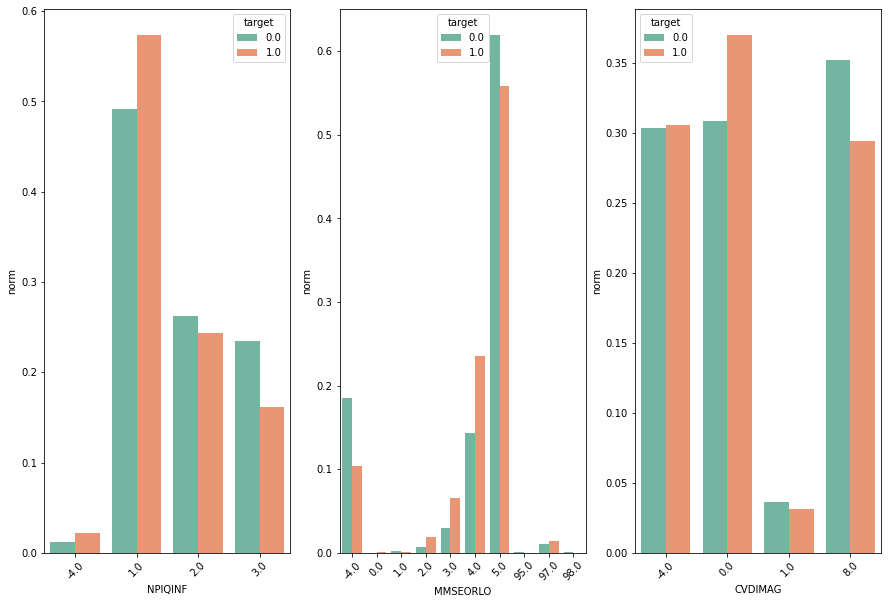

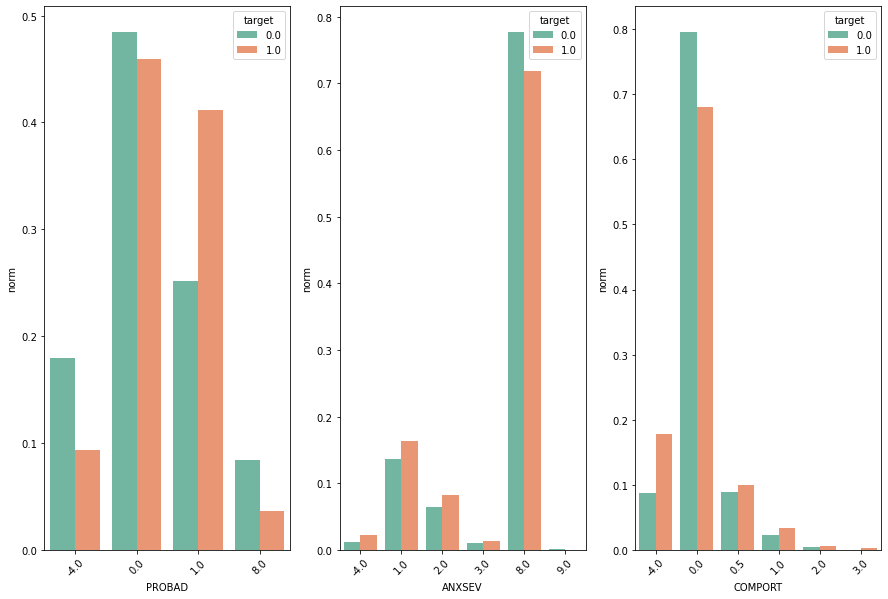

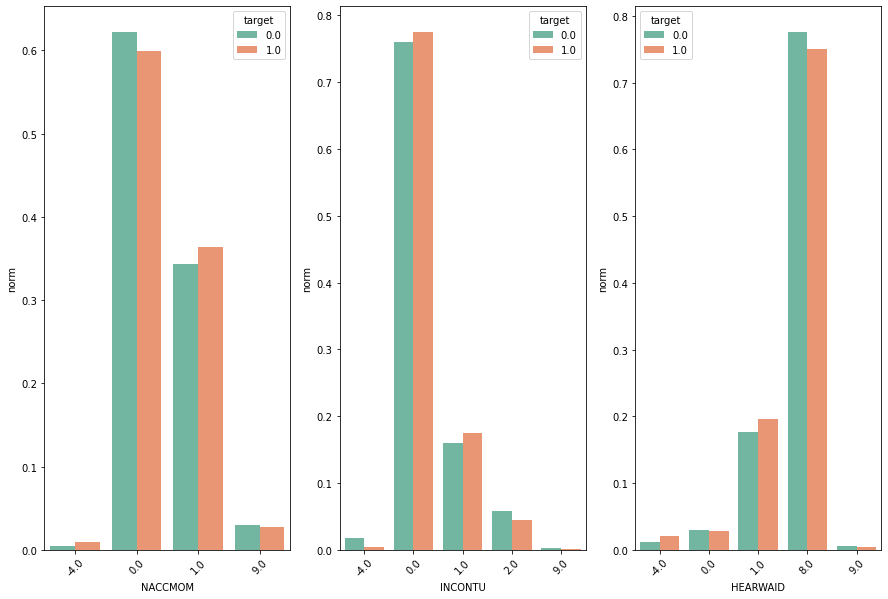

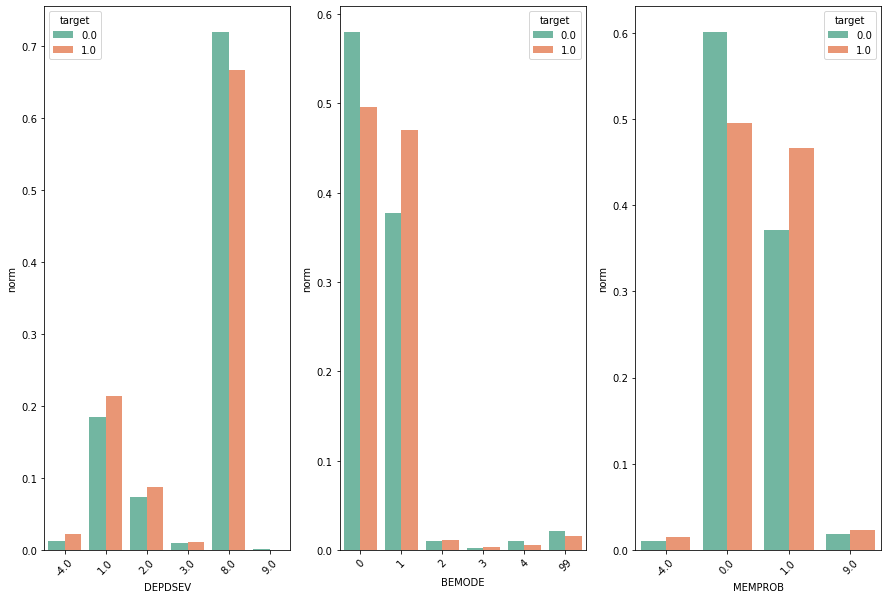

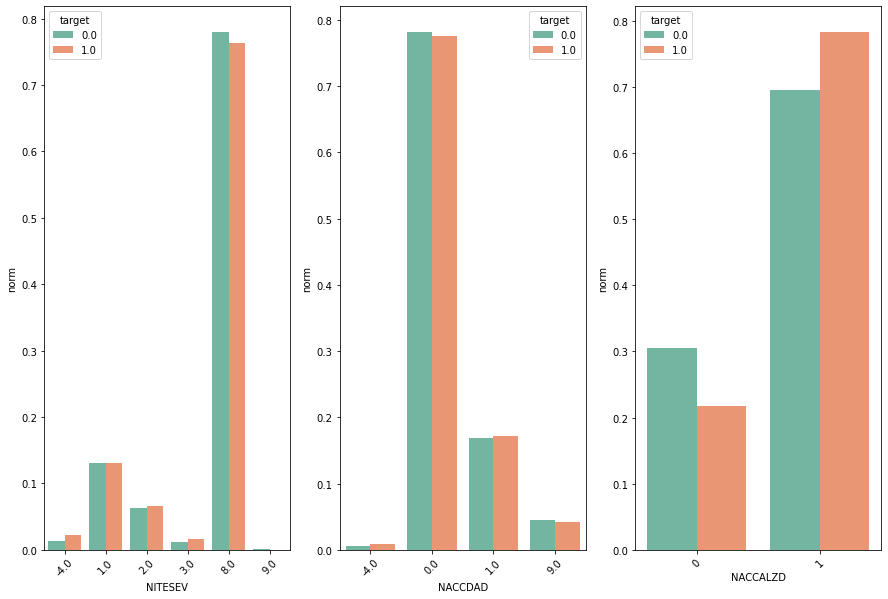

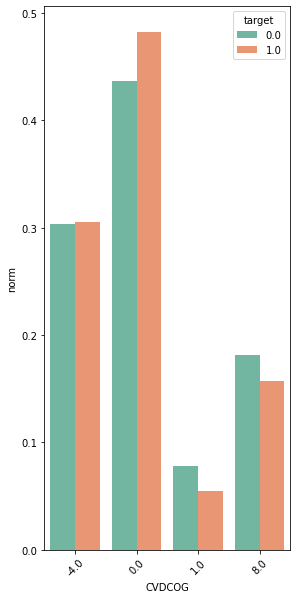

In [42]:
restrict=feat_importances.nlargest(100).index
dfres=res[restrict.to_list()]
temp=dfres.copy()
temp['target']=df['target']
norm_count_group(temp,'target')

Initial production model with 100 features + non-dropped nans

In [46]:
res=df.drop(['NEWINF','target','visit_interval'], axis=1)
dfres=res[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(dfres, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


0.728538283062645
0.7185185185185186
0.5511363636363636


In [51]:
# save this latest model for now
pickle.dump(model_feat1, open('../src/models/01prelim_model.sav', 'wb'))
pickle.dump(restrict, open('../src/features/01prelim_features.sav', 'wb'))